#Download Dataset

In [ ]:
!pip install fiftyone

In [ ]:
!pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz
import matplotlib.pyplot as plt
from fiftyone import ViewField as F
import torch
import torchvision
from PIL import Image
from torchvision.transforms import functional as func
import fiftyone as fo

Migrating database to v0.18.0


INFO:fiftyone.migrations.runner:Migrating database to v0.18.0


In [ ]:
dataset = foz.load_zoo_dataset(
    "open-images-v6", 
    split="validation",
)
dataset.persistent = True

INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/coco-2017/validation' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to '/root/fiftyone/coco-2017/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [8.0s elapsed, 0s remaining, 267.9Mb/s]       


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [8.0s elapsed, 0s remaining, 267.9Mb/s]       


Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Downloading images to '/root/fiftyone/coco-2017/tmp-download/val2017.zip'


 100% |██████|    6.1Gb/6.1Gb [24.5s elapsed, 0s remaining, 267.5Mb/s]      


INFO:eta.core.utils: 100% |██████|    6.1Gb/6.1Gb [24.5s elapsed, 0s remaining, 267.5Mb/s]      


Extracting images to '/root/fiftyone/coco-2017/validation/data'


INFO:fiftyone.utils.coco:Extracting images to '/root/fiftyone/coco-2017/validation/data'


Writing annotations to '/root/fiftyone/coco-2017/validation/labels.json'


INFO:fiftyone.utils.coco:Writing annotations to '/root/fiftyone/coco-2017/validation/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |███████████████| 5000/5000 [29.3s elapsed, 0s remaining, 176.0 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [29.3s elapsed, 0s remaining, 176.0 samples/s]      


Dataset 'evaluate-detections-tutorial' created


INFO:fiftyone.zoo.datasets:Dataset 'evaluate-detections-tutorial' created


In [ ]:
# Print a ground truth detection
sample = dataset.first()
print(sample.ground_truth.detections[0])

<Detection: {
    'id': '63a0ab66f6845156d55aabd4',
    'attributes': {},
    'tags': [],
    'label': 'potted plant',
    'bounding_box': [
        0.37028125,
        0.3345305164319249,
        0.038593749999999996,
        0.16314553990610328,
    ],
    'mask': None,
    'confidence': None,
    'index': None,
    'supercategory': 'furniture',
    'iscrowd': 0,
}>


In [ ]:
# Print some information about the dataset
print(dataset)

Name:        evaluate-detections-tutorial
Media type:  image
Num samples: 5000
Persistent:  True
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


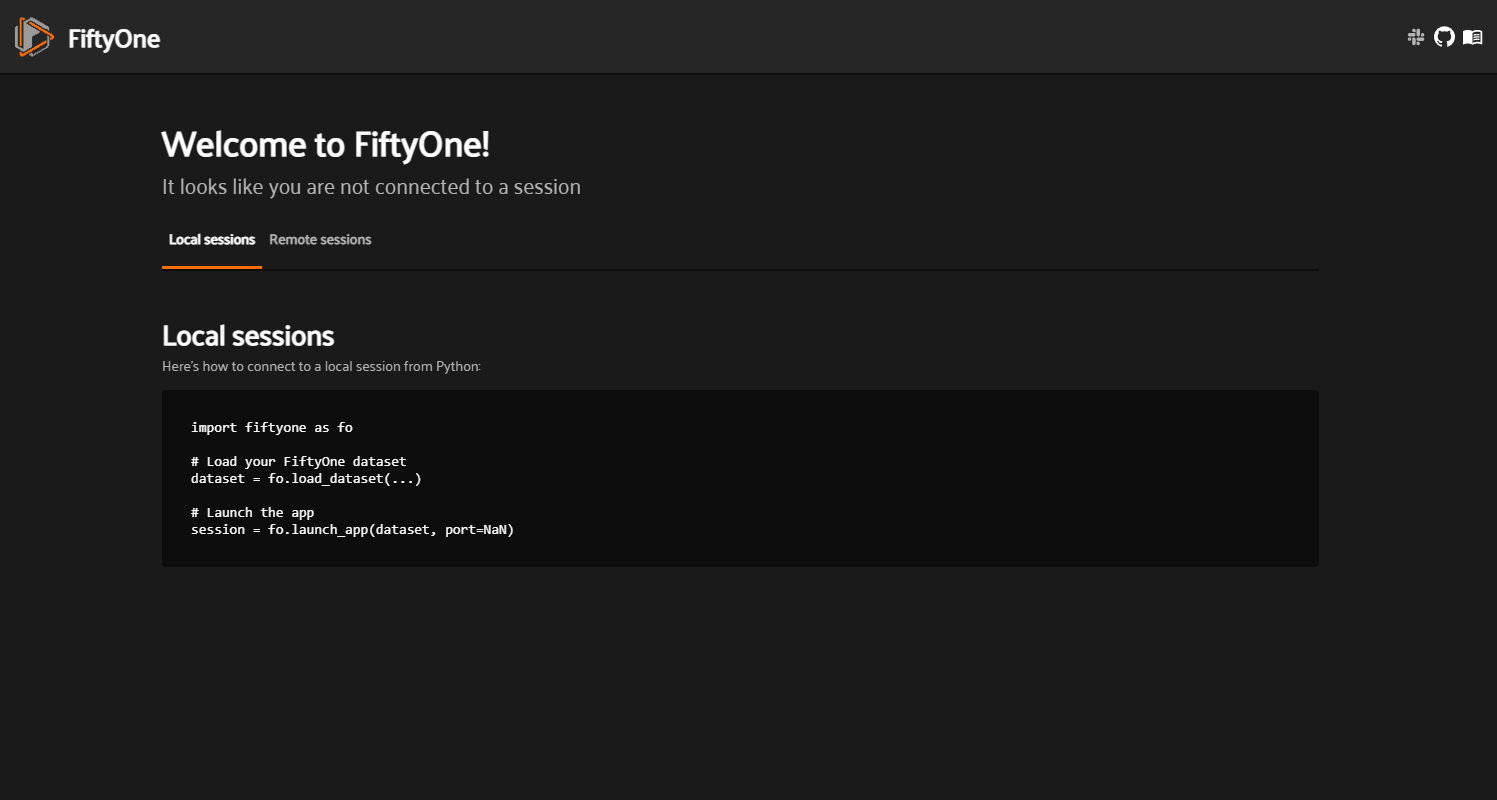

<IPython.core.display.Javascript object>

In [ ]:
session = fo.launch_app(dataset)

In [ ]:
predictions_view = dataset.take(5000, seed=51)



## Object Detection Models


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [ ]:

# Run the model on GPU if it is available

# Load a pre-trained Faster R-CNN model
model_fasterrcnn_resnet50 = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True);
model_fasterrcnn_resnet50.to(device)
model_fasterrcnn_resnet50.eval()


model_fasterrcnn_mobilenet = torchvision.models.detection.fasterrcnn_mobilenet_v3_large_320_fpn(pretrained=True);
model_fasterrcnn_mobilenet.to(device)
model_fasterrcnn_mobilenet.eval()


model_ssd = torchvision.models.detection.ssdlite320_mobilenet_v3_large(pretrained=True);
model_ssd.to(device)
model_ssd.eval()

print("Models are ready")

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_320_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_320_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_mobilenet_v3_large_320_fpn-907ea3f9.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_mobilenet_v3_large_320_fpn-907ea3f9.pth


  0%|          | 0.00/74.2M [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSDLite320_MobileNet_V3_Large_Weights.COCO_V1`. You can also use `weights=SSDLite320_MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssdlite320_mobilenet_v3_large_coco-a79551df.pth" to /root/.cache/torch/hub/checkpoints/ssdlite320_mobilenet_v3_large_coco-a79551df.pth


  0%|          | 0.00/13.4M [00:00<?, ?B/s]

Models are ready


In [ ]:
classes = dataset.default_classes

In [ ]:

def eval(model, predictions_view, save_model_name):

  # Add predictions to samples
  with fo.ProgressBar() as pb:
      for sample in pb(predictions_view):
          # Load image
          image = Image.open(sample.filepath)
          image = func.to_tensor(image).to(device)
          c, h, w = image.shape
          
          # Perform inference
          preds = model([image])[0]
          labels = preds["labels"].cpu().detach().numpy()
          scores = preds["scores"].cpu().detach().numpy()
          boxes = preds["boxes"].cpu().detach().numpy()
          
          # Convert detections to FiftyOne format
          detections = []
          for label, score, box in zip(labels, scores, boxes):
              # Convert to [top-left-x, top-left-y, width, height]
              # in relative coordinates in [0, 1] x [0, 1]
              x1, y1, x2, y2 = box
              rel_box = [x1 / w, y1 / h, (x2 - x1) / w, (y2 - y1) / h]

              detections.append(
                  fo.Detection(
                      label=classes[label],
                      bounding_box=rel_box,
                      confidence=score
                  )
              )
          
          # Save predictions to dataset
          sample[save_model_name] = fo.Detections(detections=detections)
          sample.save()

  print("Finished adding predictions")

In [ ]:
eval(model=model_fasterrcnn_resnet50, predictions_view=predictions_view, save_model_name='faster_rcnn')

 100% |███████████████| 5000/5000 [12.3m elapsed, 0s remaining, 6.5 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [12.3m elapsed, 0s remaining, 6.5 samples/s]      


Finished adding predictions


In [ ]:
eval(model=model_fasterrcnn_mobilenet, predictions_view=predictions_view, save_model_name='mobile_net')

 100% |███████████████| 5000/5000 [5.0m elapsed, 0s remaining, 16.8 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [5.0m elapsed, 0s remaining, 16.8 samples/s]      


Finished adding predictions


In [ ]:
eval(model=model_ssd, predictions_view=predictions_view, save_model_name='ssd_model')

 100% |███████████████| 5000/5000 [14.7m elapsed, 0s remaining, 5.5 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [14.7m elapsed, 0s remaining, 5.5 samples/s]      


Finished adding predictions


In [ ]:
session.view = predictions_view

# **1 - FasterRCNN Resnet50 Model**

## **All data W/O Thershold**

In [ ]:
r_no_th = predictions_view.evaluate_detections(
    "faster_rcnn",
    gt_field="ground_truth",
    eval_key="eval",
    compute_mAP=True,
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 5000/5000 [12.1m elapsed, 0s remaining, 6.1 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [12.1m elapsed, 0s remaining, 6.1 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 5000/5000 [3.8m elapsed, 0s remaining, 20.4 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [3.8m elapsed, 0s remaining, 20.4 samples/s]      


In [ ]:
counts = dataset.count_values("ground_truth.detections.label")
classes_sort = sorted(counts, key=counts.get, reverse=True)[:]

In [ ]:
def calc_map(result):
  print('mAP : ', result.mAP())
  result.print_report(classes=classes_sort)
  plot = result.plot_pr_curves(classes=classes_sort)
  plot.show()

#### mAP

In [ ]:
calc_map(r_no_th)

mAP :  0.369305258451958
                precision    recall  f1-score   support

        person       0.44      0.94      0.60     18206
           car       0.25      0.87      0.39      2414
         chair       0.15      0.73      0.26      2074
          book       0.31      0.87      0.46      2947
        bottle       0.25      0.82      0.38      1354
           cup       0.21      0.80      0.33       960
  dining table       0.09      0.76      0.16       703
 traffic light       0.19      0.73      0.30       654
          bowl       0.16      0.83      0.27       652
       handbag       0.09      0.61      0.15       540
          bird       0.39      0.83      0.53       840
          boat       0.20      0.83      0.32       626
         truck       0.14      0.84      0.24       419
         bench       0.08      0.65      0.15       477
      umbrella       0.22      0.82      0.35       508
           cow       0.40      0.93      0.55       581
        banana       0

#### Accuarcy, Precision, Recall

In [ ]:
d = r_no_th.metrics(classes_sort)
acc = d['accuracy']
pre = d['precision']
rec = d['recall']
fsc= d['fscore']

In [ ]:
print('accuracy : ', acc)
print('precision : ', pre)
print('recall : ', rec)
print('fscore : ', fsc)


accuracy :  0.23967084213619905
precision :  0.24941429016584532
recall :  0.8598484094933058
fscore :  0.38666851552820036


#### Confusion Matrix

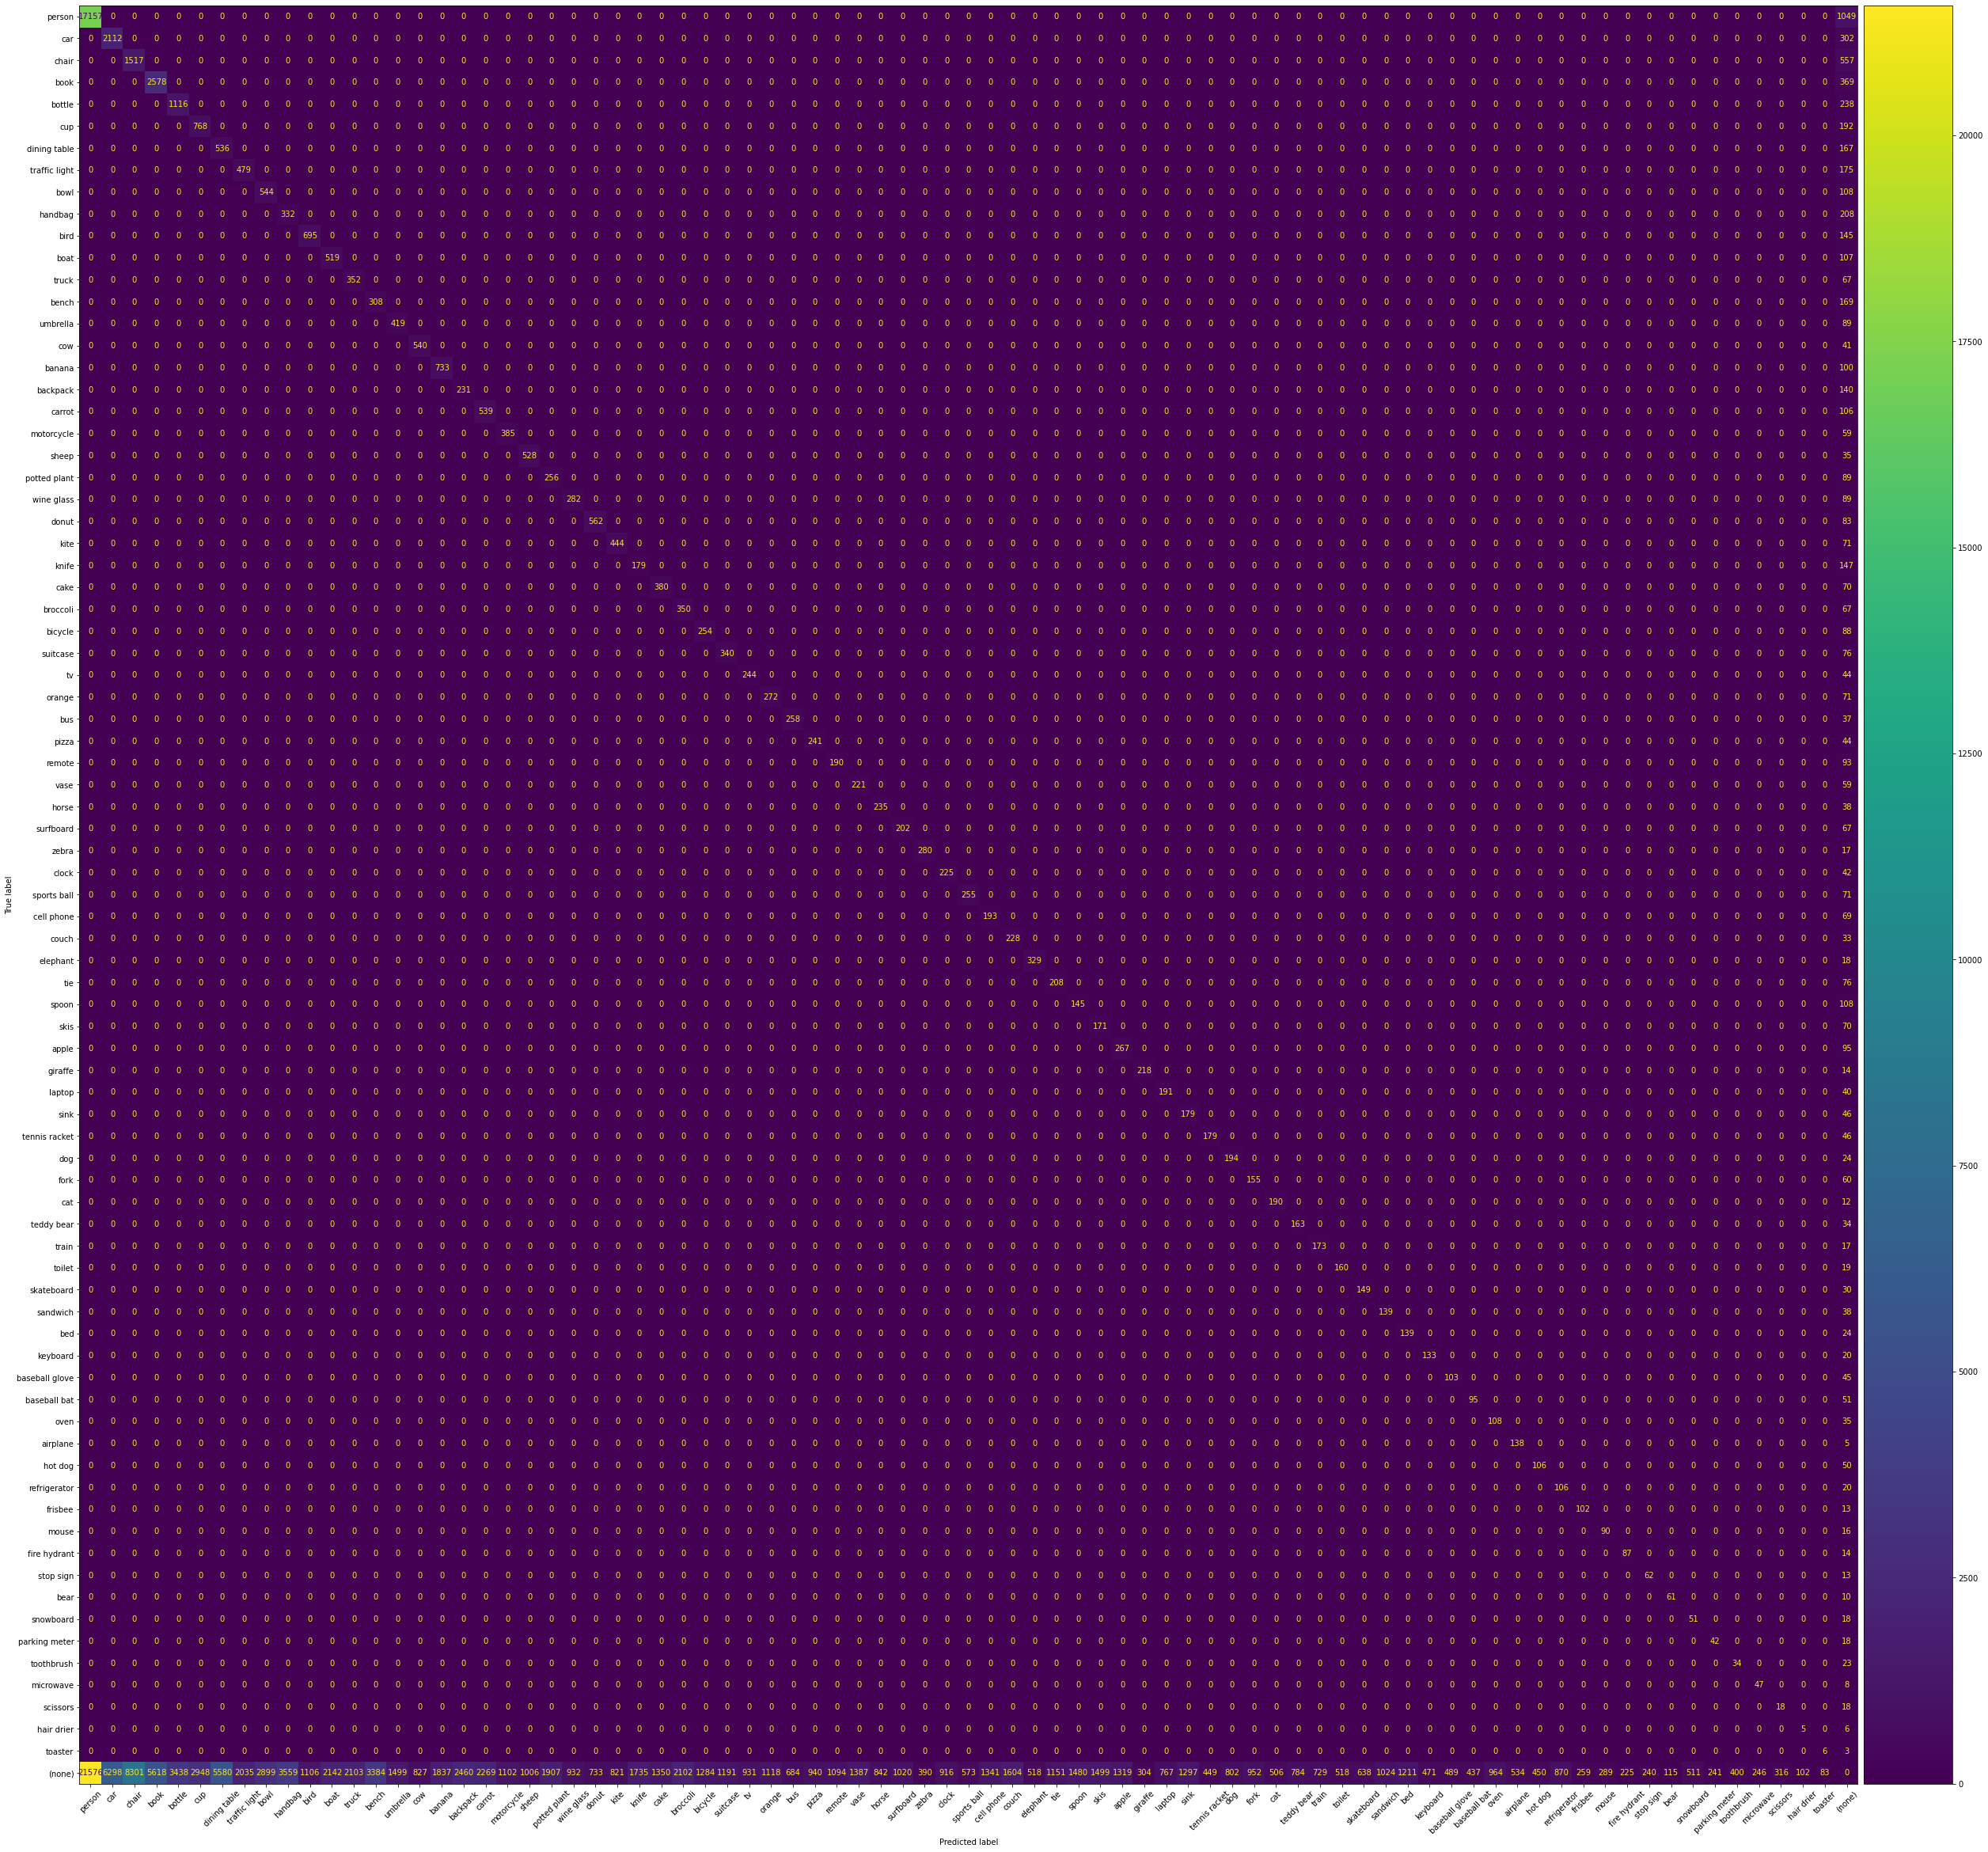

In [ ]:
plot = r_no_th.plot_confusion_matrix(classes=classes_sort[:], backend="matplotlib", figsize=(35, 35))
plot.show()

In [ ]:
plot = r_no_th.plot_confusion_matrix(classes=classes_sort[:10])
plot.show()

### TP, FP, FN, IOU

In [ ]:
eval_patches = predictions_view.to_evaluation_patches("eval")

print(eval_patches.count_values("type"))

{'tp': 29736, 'fn': 7045, 'fp': 130072}


In [ ]:
iou = eval_patches.count_values('iou')
x = list(iou.items())
sum_iou = 0.0
for i,v in x:
  if not i:
    continue
  sum_iou += (i * v)

print('IOU Score', sum_iou / sum(iou.values()))


IOU Score 0.1420186106838161


## **Using Confidence TH = 0.5**

In [ ]:
c_50 = predictions_view.filter_labels("faster_rcnn", F("confidence") >= 0.5, only_matches=False)


In [ ]:
r_50 = c_50.evaluate_detections(
    "faster_rcnn",
    gt_field="ground_truth",
    eval_key="eval",
    compute_mAP=True,
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 5000/5000 [3.6m elapsed, 0s remaining, 23.4 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [3.6m elapsed, 0s remaining, 23.4 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 5000/5000 [1.7m elapsed, 0s remaining, 55.7 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [1.7m elapsed, 0s remaining, 55.7 samples/s]      


#### mAP

In [ ]:
calc_map(r_50)

mAP :  0.34428277807769436
                precision    recall  f1-score   support

        person       0.76      0.84      0.80     12874
           car       0.62      0.73      0.67      2086
         chair       0.49      0.49      0.49      1861
          book       0.59      0.63      0.61      1832
        bottle       0.58      0.65      0.61      1114
           cup       0.54      0.61      0.57       912
  dining table       0.38      0.54      0.44       697
 traffic light       0.53      0.59      0.56       644
          bowl       0.48      0.63      0.55       635
       handbag       0.35      0.31      0.33       540
          bird       0.74      0.68      0.71       627
          boat       0.51      0.62      0.56       463
         truck       0.50      0.59      0.54       415
         bench       0.39      0.38      0.38       414
      umbrella       0.57      0.63      0.60       435
           cow       0.70      0.76      0.73       414
        banana      

#### Accuarcy, Precision, Recall

In [ ]:
d = r_50.metrics(classes_sort)
acc = d['accuracy']
pre = d['precision']
rec = d['recall']
fsc= d['fscore']

In [ ]:
print('accuracy : ', acc)
print('precision : ', pre)
print('recall : ', rec)
print('fscore : ', fsc)


accuracy :  0.48578869693549787
precision :  0.6206797107236346
recall :  0.6909077439747136
fscore :  0.6539135718793092


#### Confusion Matrix

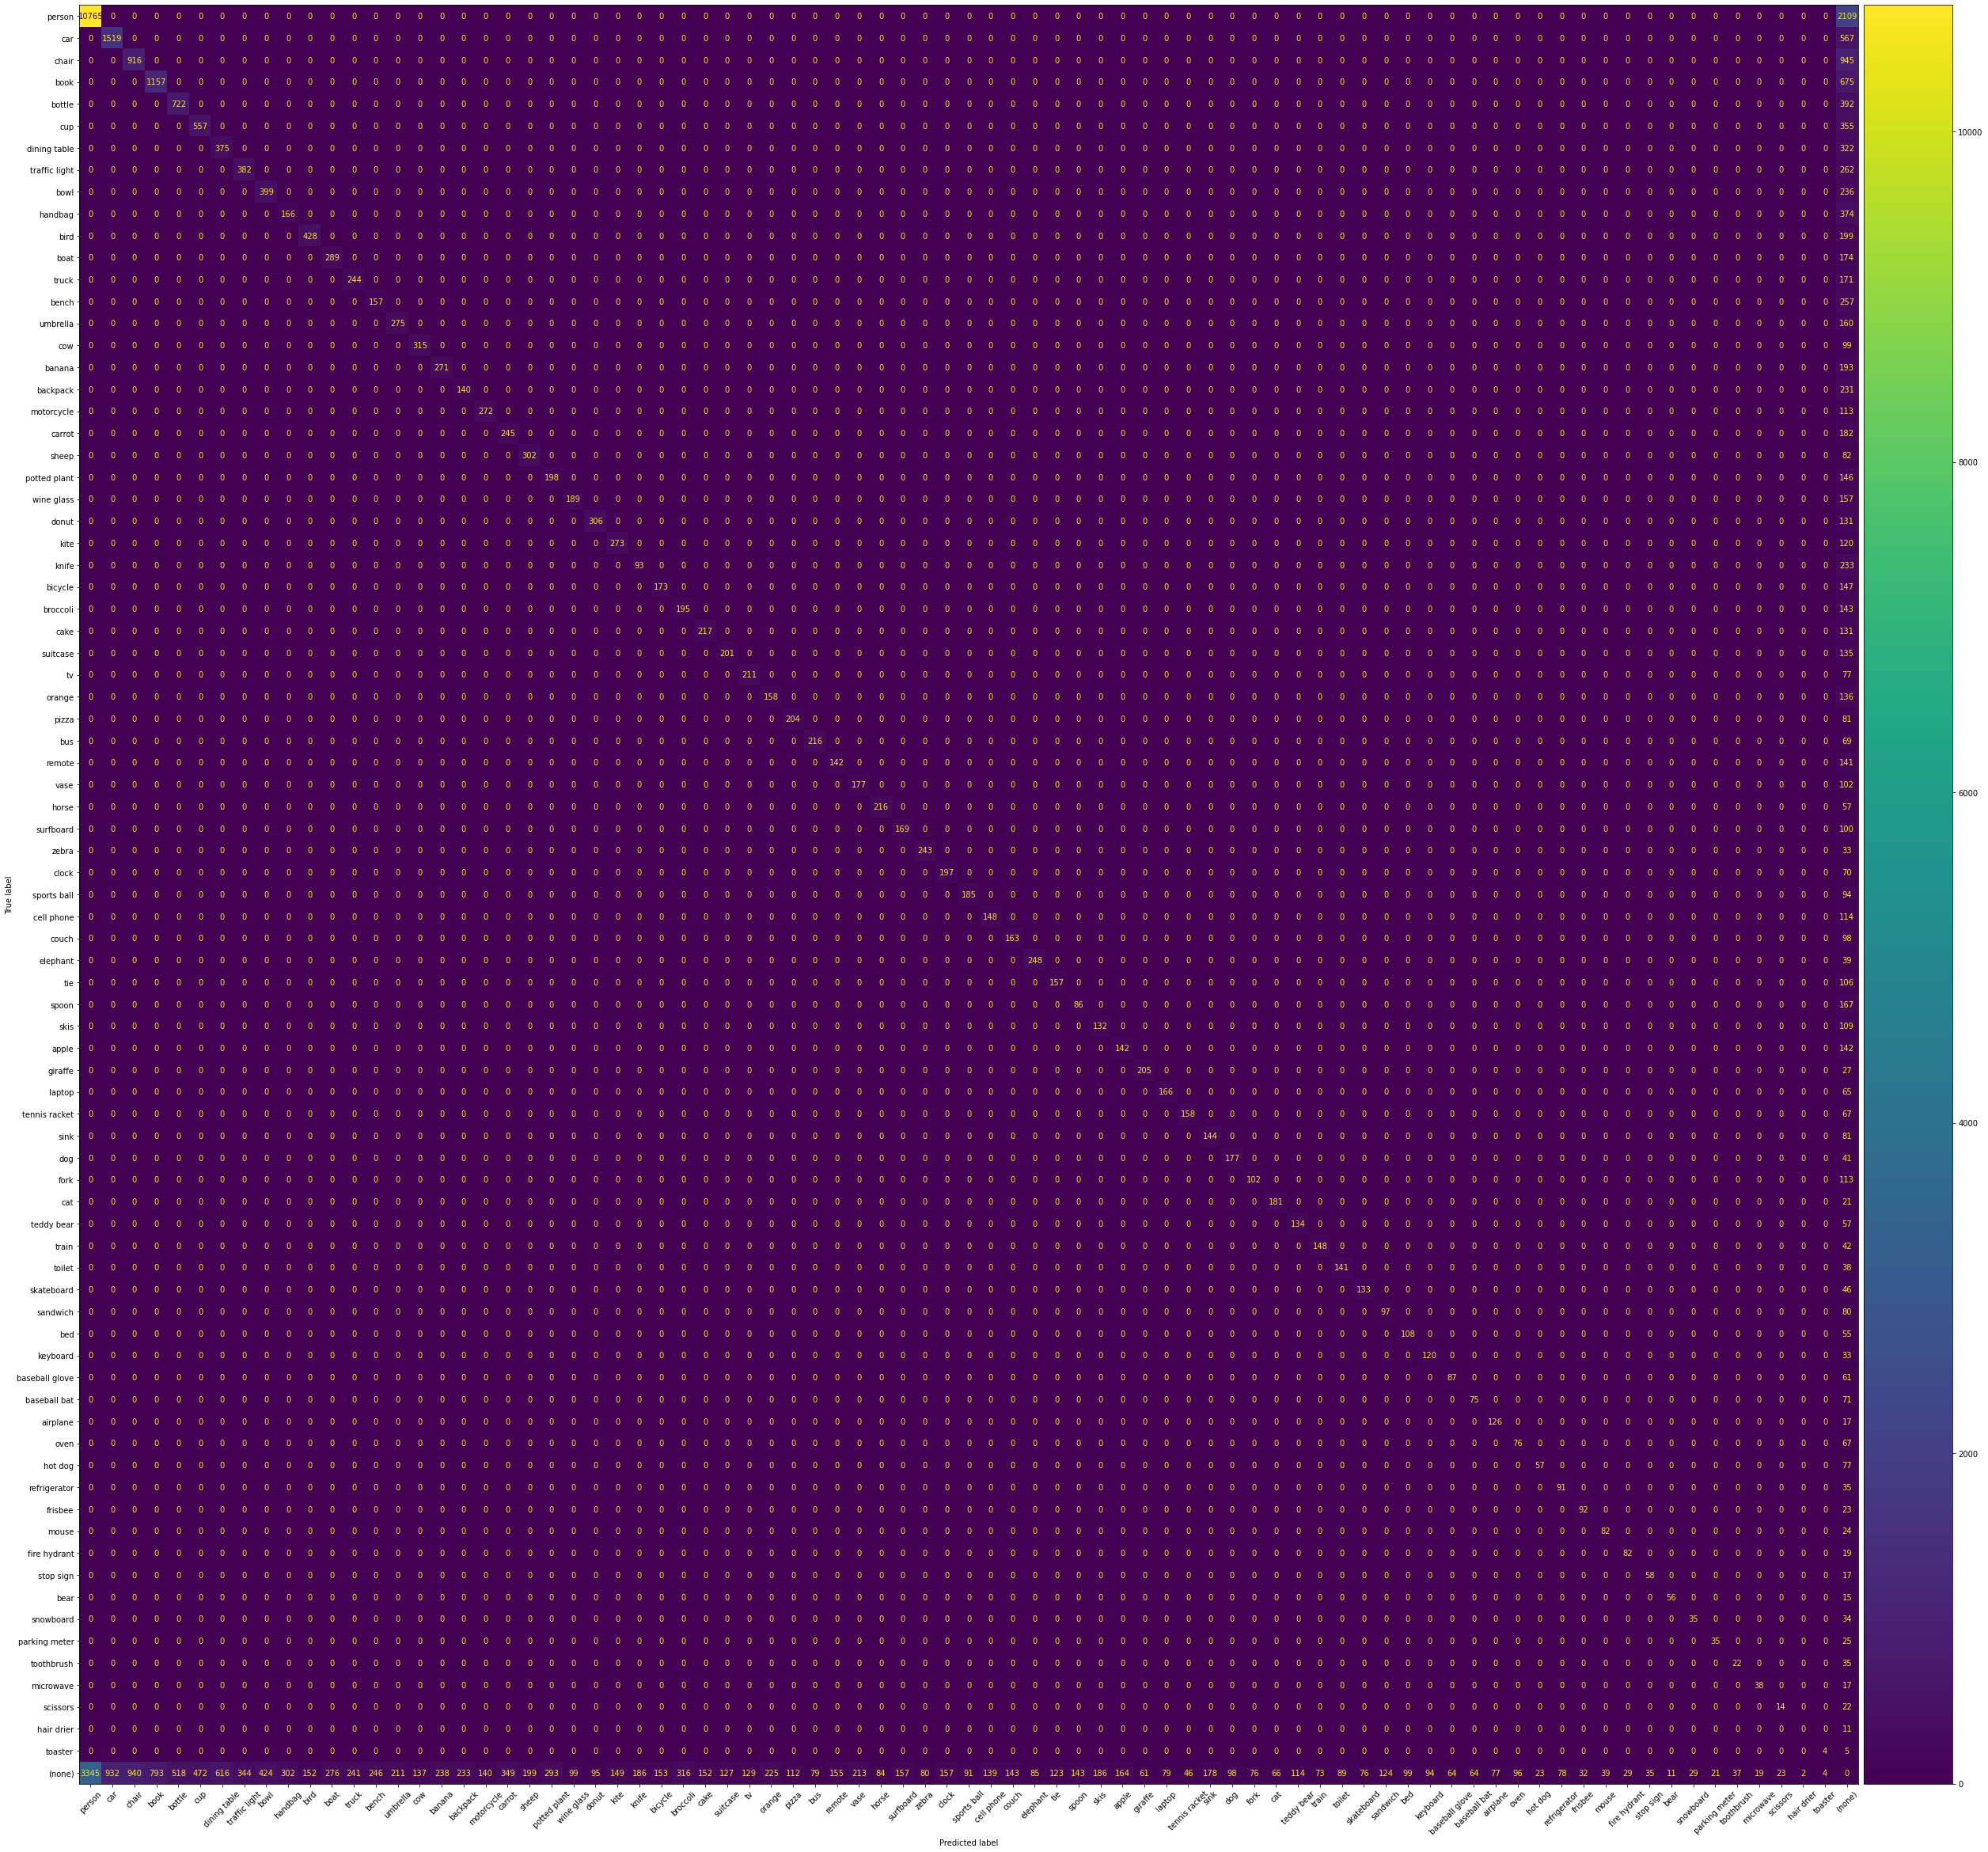

In [ ]:
plot = r_50.plot_confusion_matrix(classes=classes_sort[:], backend="matplotlib", figsize=(35, 35))
plot.show()

In [ ]:
plot = r_50.plot_confusion_matrix(classes=classes_sort[:10])
plot.show()

/usr/local/lib/python3.8/dist-packages/fiftyone/core/plots/plotly.py:1782: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://voxel51.com/docs/fiftyone/user_guide/plots.html#working-in-notebooks for more information.



### TP, FP, FN, IOU

In [ ]:
eval_patches = c_50.to_evaluation_patches("eval")

print(eval_patches.count_values("type"))

{'fp': 17099, 'tp': 24264, 'fn': 12517}


In [ ]:
iou = eval_patches.count_values('iou')
x = list(iou.items())
sum_iou = 0.0
for i,v in x:
  if not i:
    continue
  sum_iou += (i * v)

print('IOU Score', sum_iou / sum(iou.values()))


IOU Score 0.36675932195745514


## **Using ConfidenceTH = 0.75**

In [ ]:
c_75 = predictions_view.filter_labels("faster_rcnn", F("confidence") >= 0.75, only_matches=False)


In [ ]:
r_75 = c_75.evaluate_detections(
    "faster_rcnn",
    gt_field="ground_truth",
    eval_key="eval",
    compute_mAP=True,
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 5000/5000 [2.7m elapsed, 0s remaining, 35.0 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [2.7m elapsed, 0s remaining, 35.0 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 5000/5000 [1.3m elapsed, 0s remaining, 67.0 samples/s]       


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [1.3m elapsed, 0s remaining, 67.0 samples/s]       


#### mAP

In [ ]:
calc_map(r_75)

mAP :  0.31845049073347786
                precision    recall  f1-score   support

        person       0.86      0.76      0.81     11820
           car       0.76      0.61      0.67      1986
         chair       0.66      0.35      0.46      1814
          book       0.65      0.30      0.41      1287
        bottle       0.72      0.55      0.62      1073
           cup       0.69      0.49      0.57       904
  dining table       0.54      0.41      0.47       697
 traffic light       0.67      0.50      0.57       641
          bowl       0.65      0.51      0.57       629
       handbag       0.52      0.19      0.28       540
          bird       0.83      0.57      0.68       531
          boat       0.63      0.50      0.56       438
         truck       0.69      0.41      0.52       415
         bench       0.57      0.28      0.38       413
      umbrella       0.71      0.54      0.61       420
           cow       0.84      0.68      0.75       391
        banana      

#### Accuarcy, Precision, Recall

In [ ]:
d = r_75.metrics(classes_sort)
acc = d['accuracy']
pre = d['precision']
rec = d['recall']
fsc= d['fscore']

In [ ]:
print('accuracy : ', acc)
print('precision : ', pre)
print('recall : ', rec)
print('fscore : ', fsc)


accuracy :  0.49486209964412814
precision :  0.7658073176608268
recall :  0.5831061956179893
fscore :  0.6620839470904194


#### Confusion Matrix

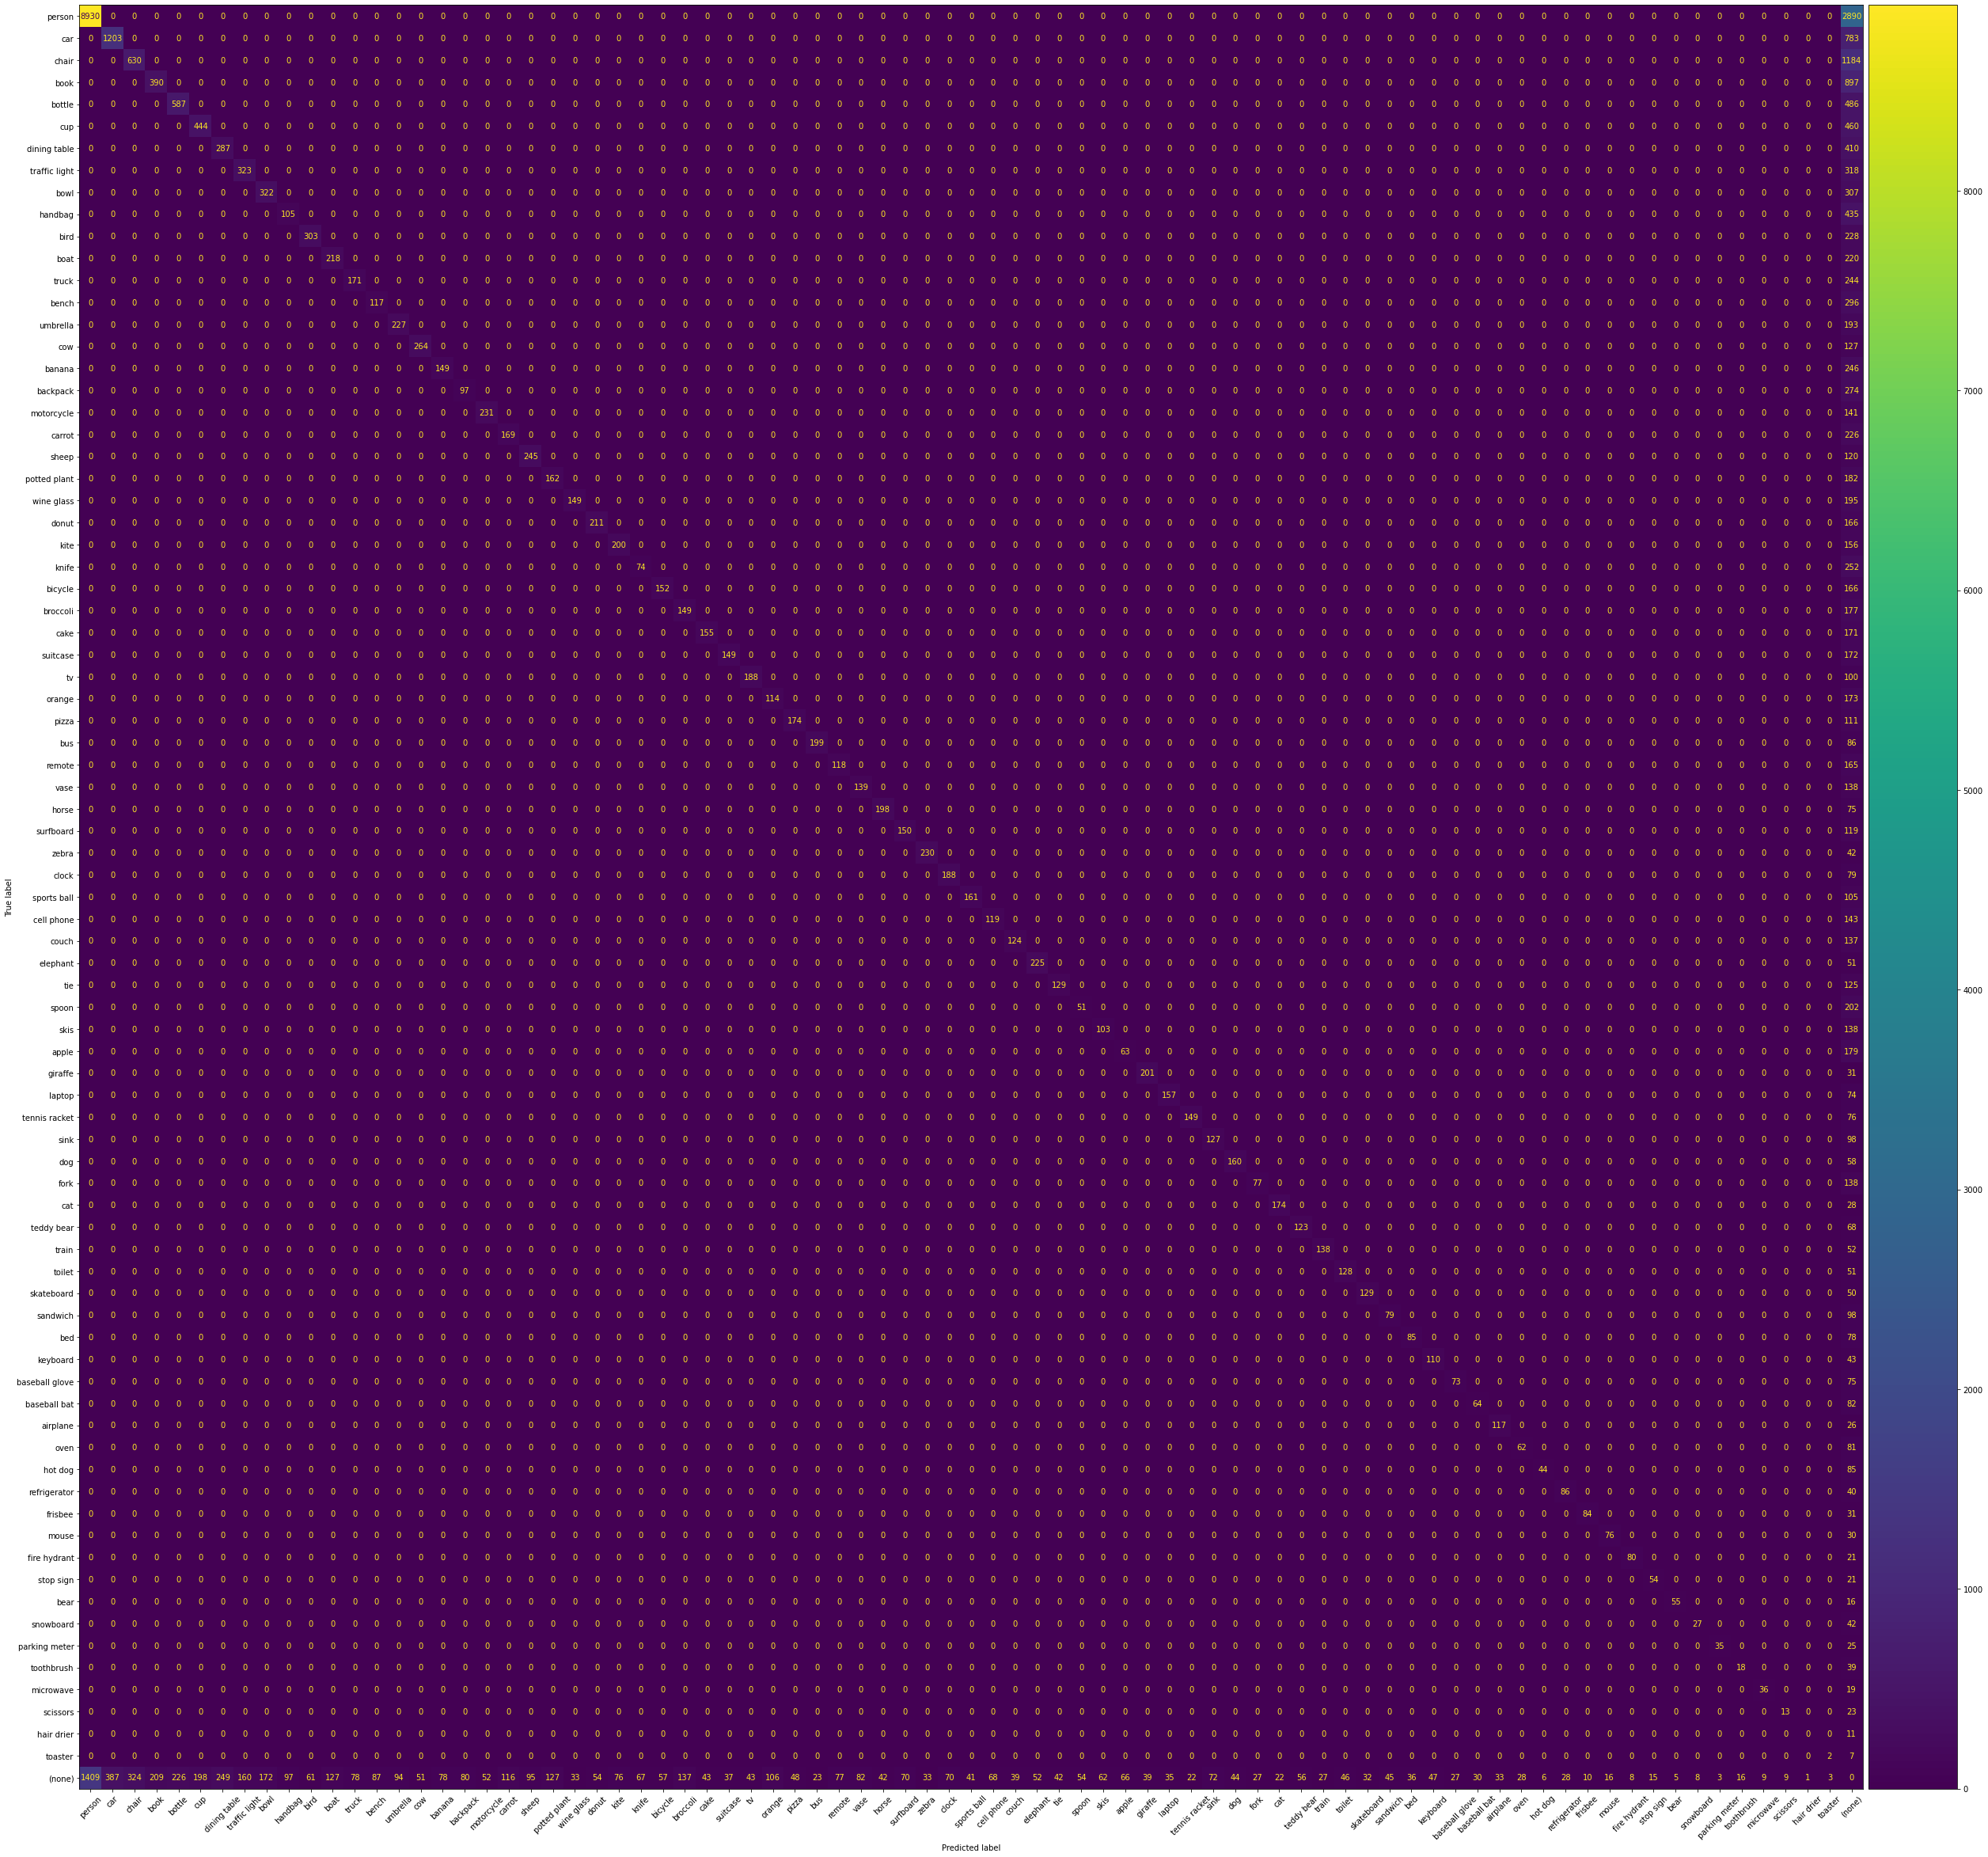

In [ ]:
plot = r_75.plot_confusion_matrix(classes=classes_sort[:], backend="matplotlib", figsize=(35, 35))
plot.show()

In [ ]:
plot = r_75.plot_confusion_matrix(classes=classes_sort[:10])
plot.show()

/usr/local/lib/python3.8/dist-packages/fiftyone/core/plots/plotly.py:1782: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://voxel51.com/docs/fiftyone/user_guide/plots.html#working-in-notebooks for more information.



### TP, FP, FN, IOU

In [ ]:
eval_patches = c_75.to_evaluation_patches("eval")

print(eval_patches.count_values("type"))

{None: 9428, 'tp': 16711, 'fn': 20070, 'fp': 2511}


In [ ]:
iou = eval_patches.count_values('iou')
x = list(iou.items())
sum_iou = 0.0
for i,v in x:
  if not i:
    continue
  sum_iou += (i * v)

print('IOU Score', sum_iou / sum(iou.values()))


IOU Score 0.2881293932529068


In [ ]:
sum(iou.values())

48720

## **Using Confidence TH = 0.9**

In [ ]:
c_90 = predictions_view.filter_labels("faster_rcnn", F("confidence") >= 0.90, only_matches=False)


In [ ]:
r_90 = c_90.evaluate_detections(
    "faster_rcnn",
    gt_field="ground_truth",
    eval_key="eval",
    compute_mAP=True,
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 5000/5000 [2.0m elapsed, 0s remaining, 42.9 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [2.0m elapsed, 0s remaining, 42.9 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 5000/5000 [1.1m elapsed, 0s remaining, 75.4 samples/s]       


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [1.1m elapsed, 0s remaining, 75.4 samples/s]       


#### mAP

In [ ]:
calc_map(r_90)

mAP :  0.2783420869029203
                precision    recall  f1-score   support

        person       0.93      0.64      0.76     11278
           car       0.87      0.46      0.61      1941
         chair       0.79      0.23      0.35      1796
          book       0.72      0.08      0.14      1171
        bottle       0.83      0.42      0.56      1053
           cup       0.82      0.38      0.52       903
  dining table       0.68      0.27      0.39       697
 traffic light       0.79      0.38      0.52       638
          bowl       0.85      0.35      0.49       628
       handbag       0.74      0.10      0.17       540
          bird       0.88      0.40      0.55       455
          boat       0.79      0.36      0.49       430
         truck       0.81      0.28      0.42       415
         bench       0.74      0.21      0.33       413
      umbrella       0.82      0.40      0.53       419
           cow       0.92      0.56      0.70       383
        banana       

#### Accuarcy, Precision, Recall

In [ ]:
d = r_90.metrics(classes_sort)
acc = d['accuracy']
pre = d['precision']
rec = d['recall']
fsc= d['fscore']

In [ ]:
print('accuracy : ', acc)
print('precision : ', pre)
print('recall : ', rec)
print('fscore : ', fsc)


accuracy :  0.43113742284922535
precision :  0.8720509554140128
recall :  0.46025172117039587
fscore :  0.6025101656427679


#### Confusion Matrix

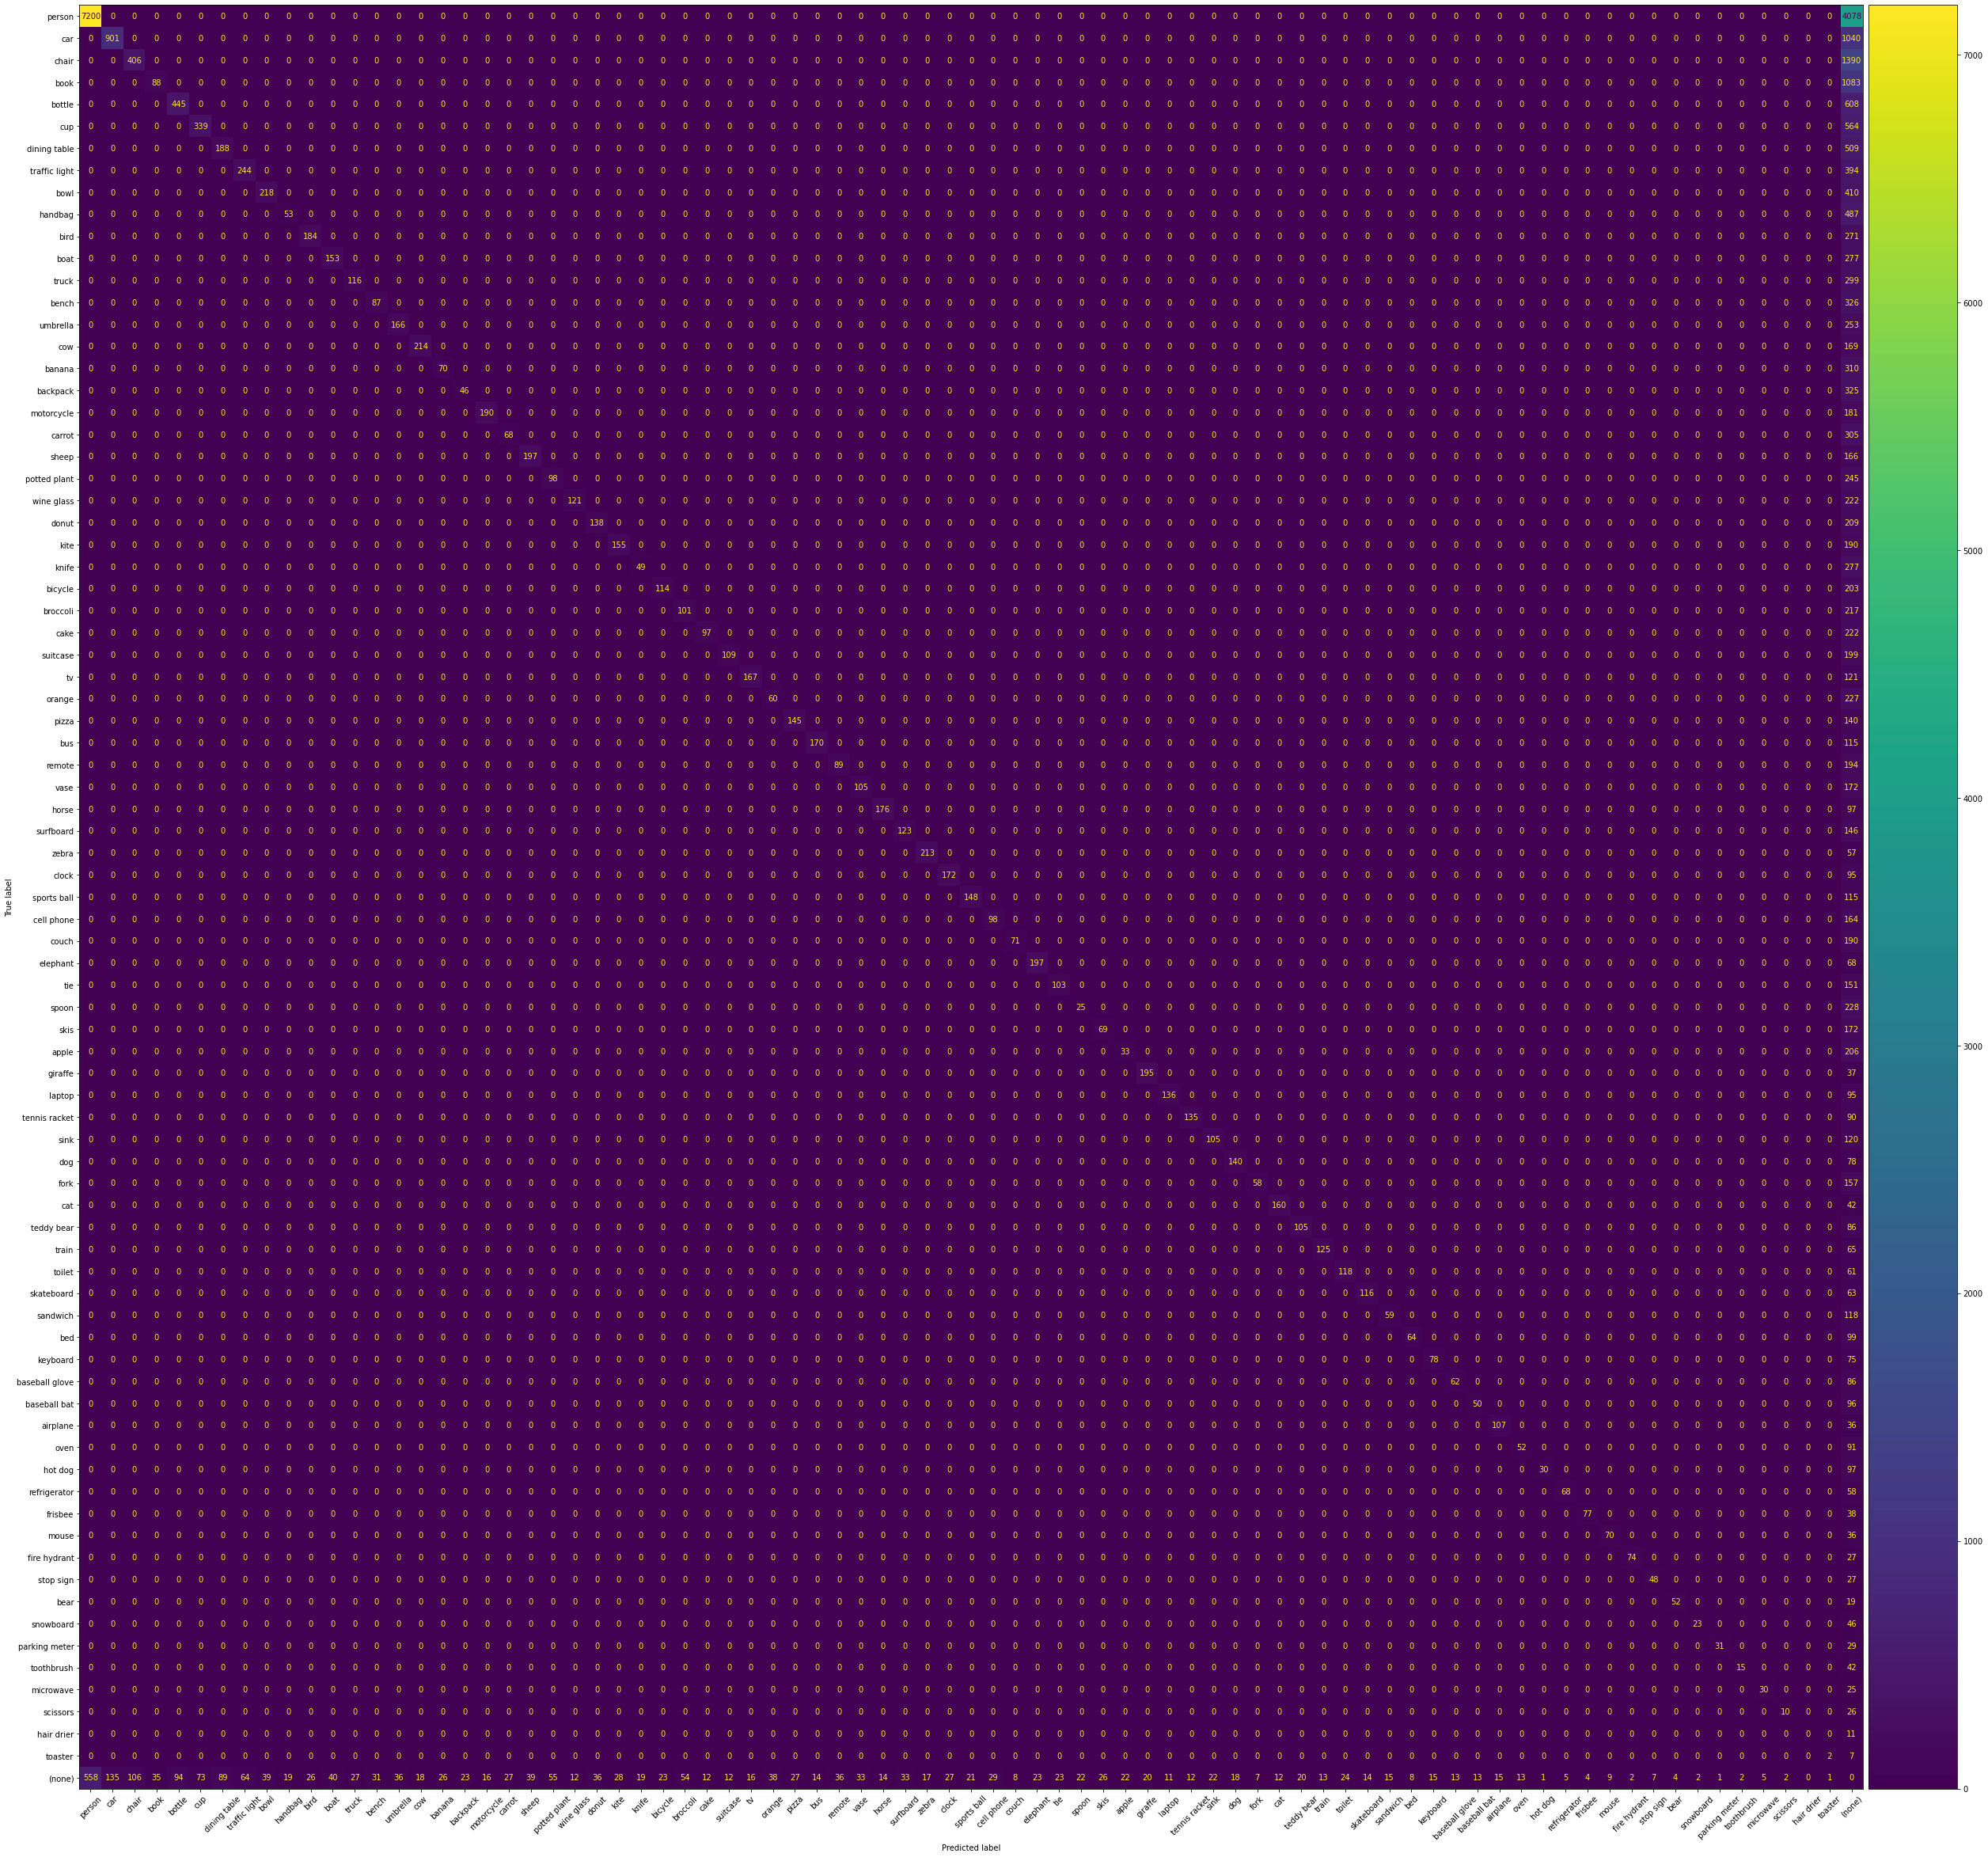

In [ ]:
plot = r_90.plot_confusion_matrix(classes=classes_sort[:], backend="matplotlib", figsize=(35, 35))
plot.show()

In [ ]:
plot = r_90.plot_confusion_matrix(classes=classes_sort[:10])
plot.show()

/usr/local/lib/python3.8/dist-packages/fiftyone/core/plots/plotly.py:1782: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://voxel51.com/docs/fiftyone/user_guide/plots.html#working-in-notebooks for more information.



### TP, FP, FN, IOU

In [ ]:
eval_patches = c_90.to_evaluation_patches("eval")

print(eval_patches.count_values("type"))

{'fp': 2511, 'tp': 16711, 'fn': 20070}


In [ ]:
iou = eval_patches.count_values('iou')
x = list(iou.items())
sum_iou = 0.0
for i,v in x:
  if not i:
    continue
  sum_iou += (i * v)

print('IOU Score', sum_iou / sum(iou.values()))


IOU Score 0.357265194932343


In [ ]:
sum(iou.values())

39292

# **2 - FasterRCNN MobileNet Model**

## **All data W/O Thershold**

In [ ]:
r_no_th = predictions_view.evaluate_detections(
    "mobile_net",
    gt_field="ground_truth",
    eval_key="eval",
    compute_mAP=True,
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 5000/5000 [3.6m elapsed, 0s remaining, 25.1 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [3.6m elapsed, 0s remaining, 25.1 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 5000/5000 [2.1m elapsed, 0s remaining, 42.3 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [2.1m elapsed, 0s remaining, 42.3 samples/s]      


In [ ]:
counts = dataset.count_values("ground_truth.detections.label")
classes_sort = sorted(counts, key=counts.get, reverse=True)[:]

In [ ]:
def calc_map(result):
  print('mAP : ', result.mAP())
  result.print_report(classes=classes_sort)
  plot = result.plot_pr_curves(classes=classes_sort)
  plot.show()

#### mAP

In [ ]:
calc_map(r_no_th)

mAP :  0.22744909672178446
                precision    recall  f1-score   support

        person       0.47      0.68      0.55     14397
           car       0.21      0.44      0.28      2120
         chair       0.21      0.39      0.27      1893
          book       0.35      0.46      0.40      1711
        bottle       0.17      0.34      0.23      1116
           cup       0.17      0.35      0.23       919
  dining table       0.23      0.53      0.32       698
 traffic light       0.11      0.21      0.15       637
          bowl       0.21      0.50      0.29       644
       handbag       0.08      0.13      0.10       540
          bird       0.37      0.53      0.44       629
          boat       0.22      0.41      0.28       485
         truck       0.18      0.51      0.27       415
         bench       0.15      0.31      0.20       413
      umbrella       0.35      0.53      0.42       455
           cow       0.39      0.67      0.49       501
        banana      

#### Accuarcy, Precision, Recall

In [ ]:
d = r_no_th.metrics(classes_sort)
acc = d['accuracy']
pre = d['precision']
rec = d['recall']
fsc= d['fscore']

In [ ]:
print('accuracy : ', acc)
print('precision : ', pre)
print('recall : ', rec)
print('fscore : ', fsc)


accuracy :  0.2482828933247478
precision :  0.3133040816879283
recall :  0.5446989852376805
fscore :  0.397799080084254


#### Confusion Matrix

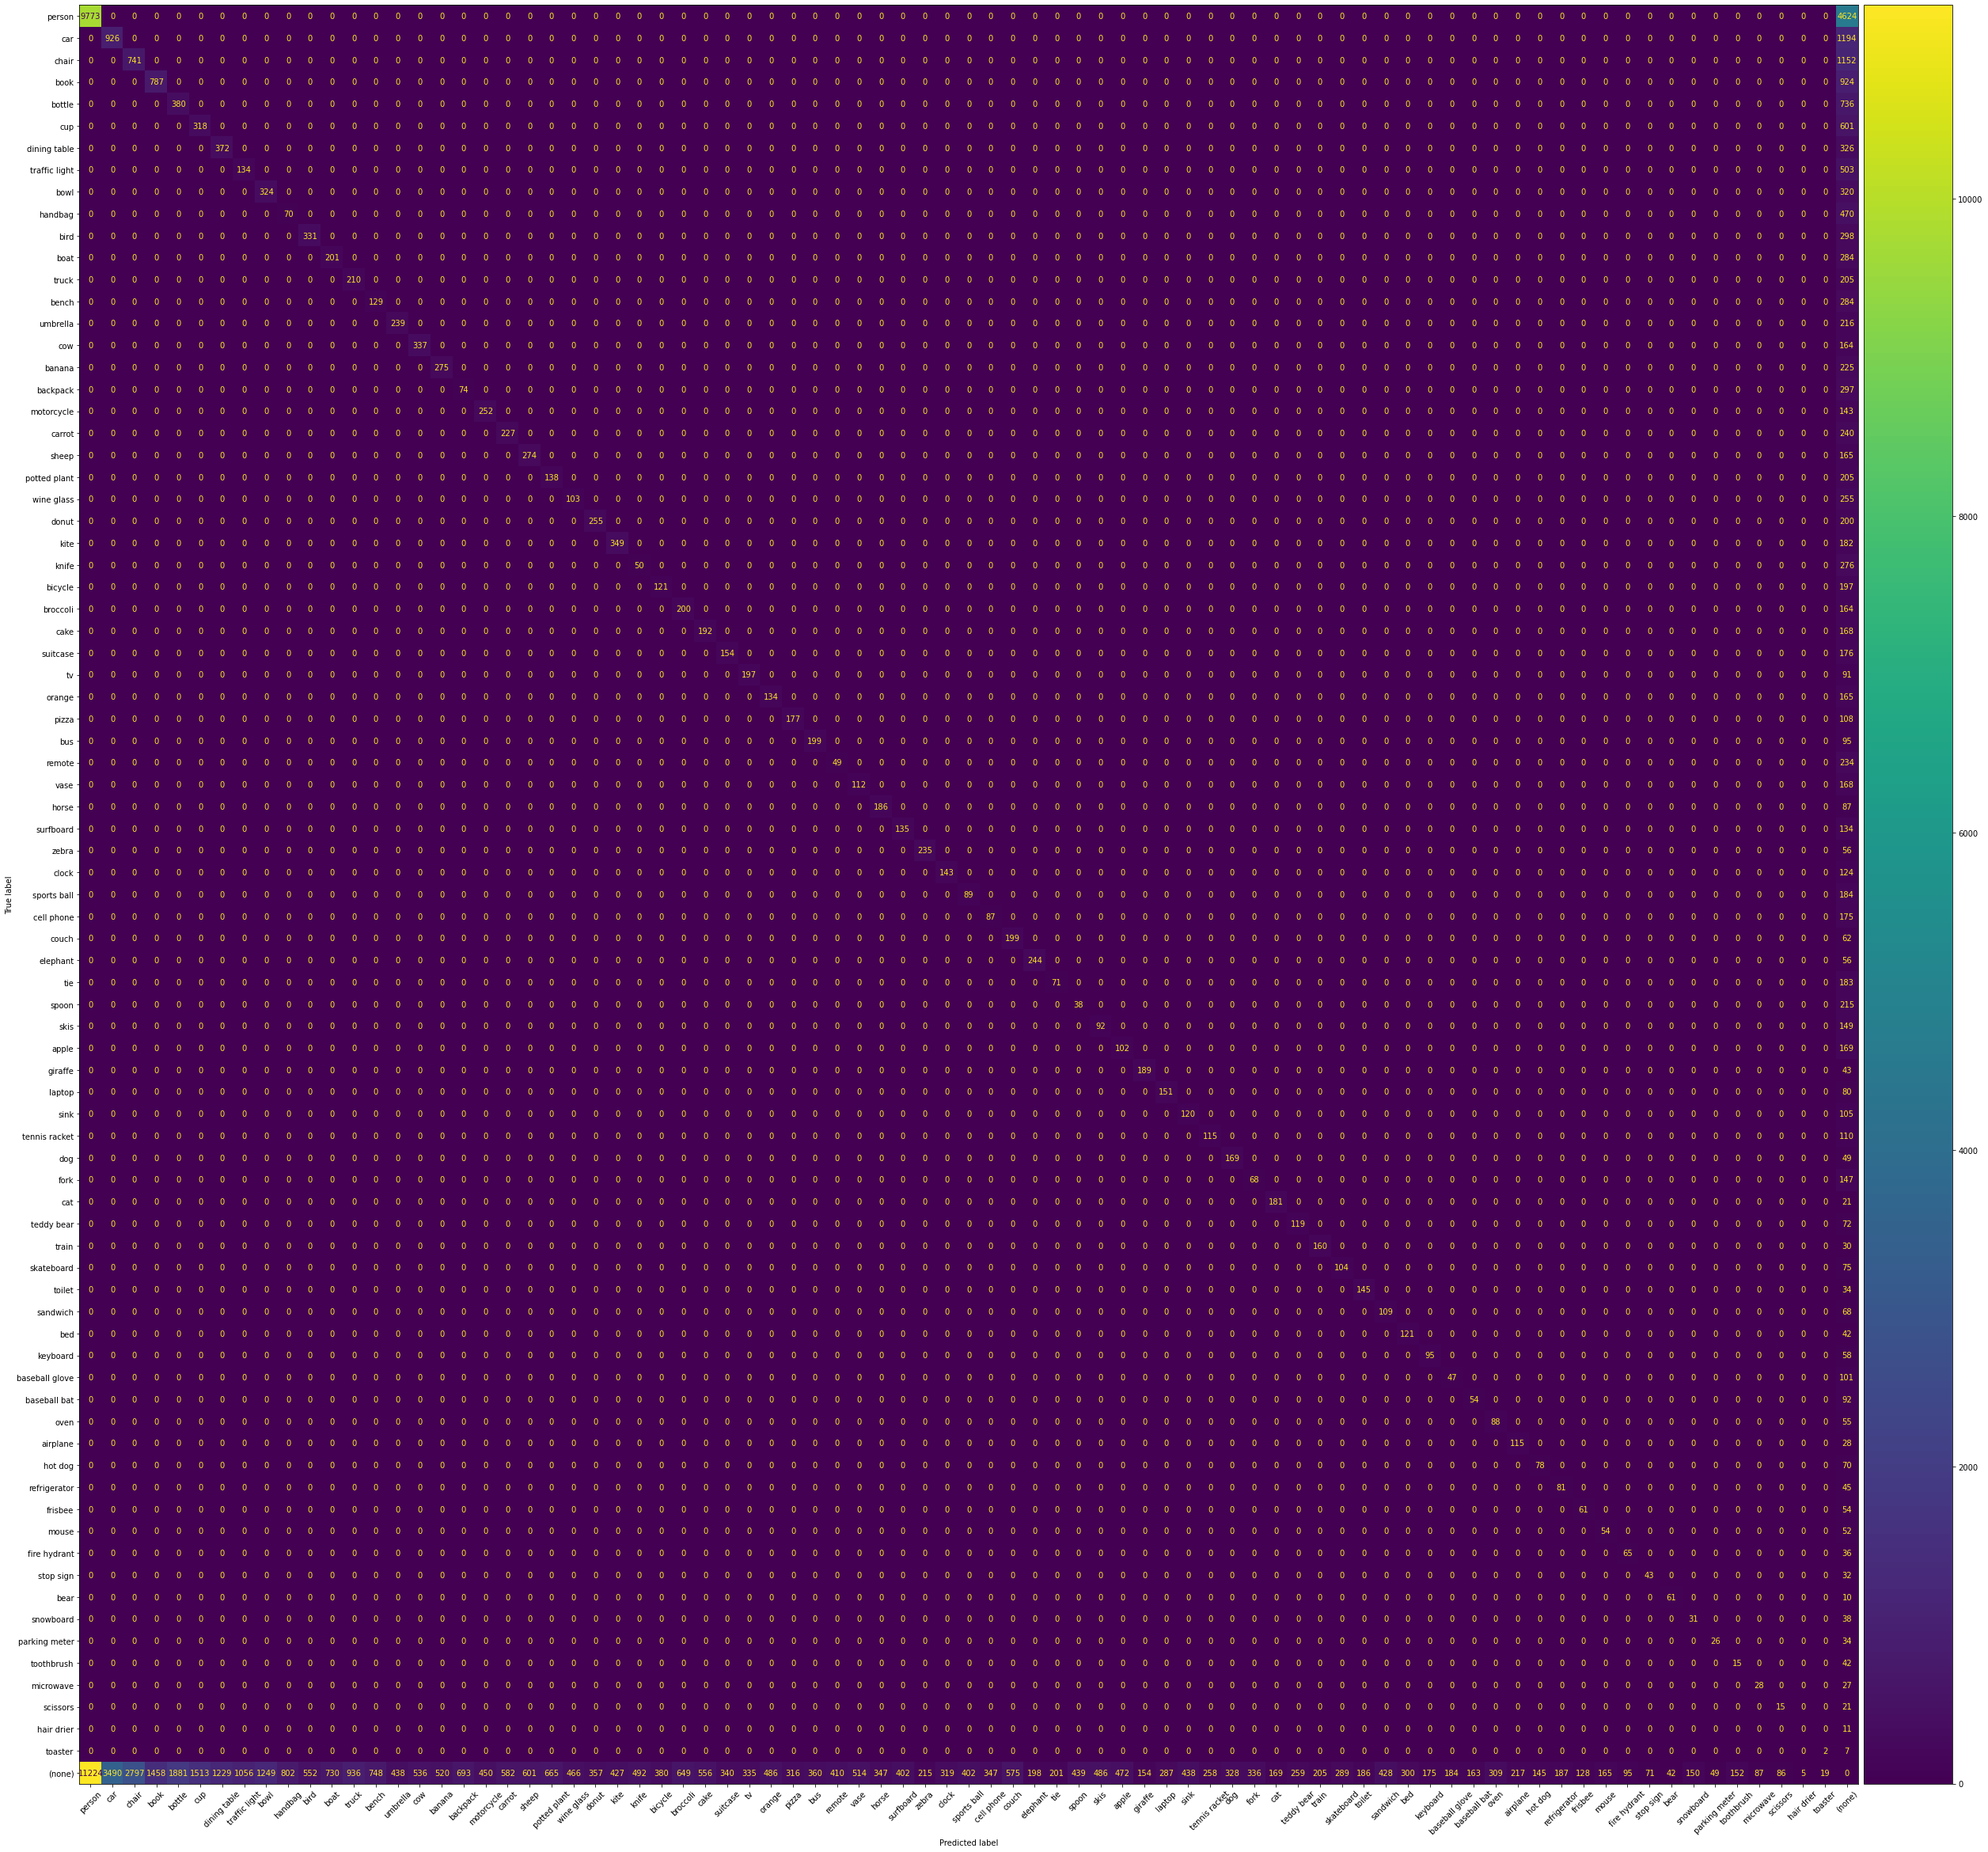

In [ ]:
plot = r_no_th.plot_confusion_matrix(classes=classes_sort[:], backend="matplotlib", figsize=(35, 35))
plot.show()

In [ ]:
plot = r_no_th.plot_confusion_matrix(classes=classes_sort[:10])
plot.show()

/usr/local/lib/python3.8/dist-packages/fiftyone/core/plots/plotly.py:1782: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://voxel51.com/docs/fiftyone/user_guide/plots.html#working-in-notebooks for more information.



### TP, FP, FN, IOU

In [ ]:
eval_patches = predictions_view.to_evaluation_patches("eval")

print(eval_patches.count_values("type"))

{'tp': 17443, 'fp': 50707, 'fn': 19338}


In [ ]:
iou = eval_patches.count_values('iou')
x = list(iou.items())
sum_iou = 0.0
for i,v in x:
  if not i:
    continue
  sum_iou += (i * v)

print('IOU Score', sum_iou / sum(iou.values()))


IOU Score 0.15360513557075334


## **Using Confidence TH = 0.5**

In [ ]:
c_50 = predictions_view.filter_labels("mobile_net", F("confidence") >= 0.5, only_matches=False)


In [ ]:
r_50 = c_50.evaluate_detections(
    "mobile_net",
    gt_field="ground_truth",
    eval_key="eval",
    compute_mAP=True,
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 5000/5000 [2.3m elapsed, 0s remaining, 40.6 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [2.3m elapsed, 0s remaining, 40.6 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 5000/5000 [1.2m elapsed, 0s remaining, 76.0 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [1.2m elapsed, 0s remaining, 76.0 samples/s]      


#### mAP

In [ ]:
calc_map(r_50)

mAP :  0.20125050249010806
                precision    recall  f1-score   support

        person       0.84      0.48      0.61     11320
           car       0.69      0.23      0.35      1937
         chair       0.62      0.18      0.27      1794
          book       0.55      0.06      0.12      1178
        bottle       0.60      0.13      0.22      1026
           cup       0.64      0.21      0.31       901
  dining table       0.59      0.40      0.47       697
 traffic light       0.67      0.11      0.19       637
          bowl       0.64      0.30      0.40       628
       handbag       0.45      0.03      0.05       540
          bird       0.75      0.23      0.35       442
          boat       0.61      0.21      0.31       433
         truck       0.63      0.24      0.35       415
         bench       0.54      0.21      0.30       413
      umbrella       0.76      0.35      0.48       418
           cow       0.74      0.40      0.52       382
        banana      

#### Accuarcy, Precision, Recall

In [ ]:
d = r_50.metrics(classes_sort)
acc = d['accuracy']
pre = d['precision']
rec = d['recall']
fsc= d['fscore']

In [ ]:
print('accuracy : ', acc)
print('precision : ', pre)
print('recall : ', rec)
print('fscore : ', fsc)


accuracy :  0.3097338715525368
precision :  0.7539864666078259
recall :  0.34455498789997313
fscore :  0.4729722247854573


#### Confusion Matrix

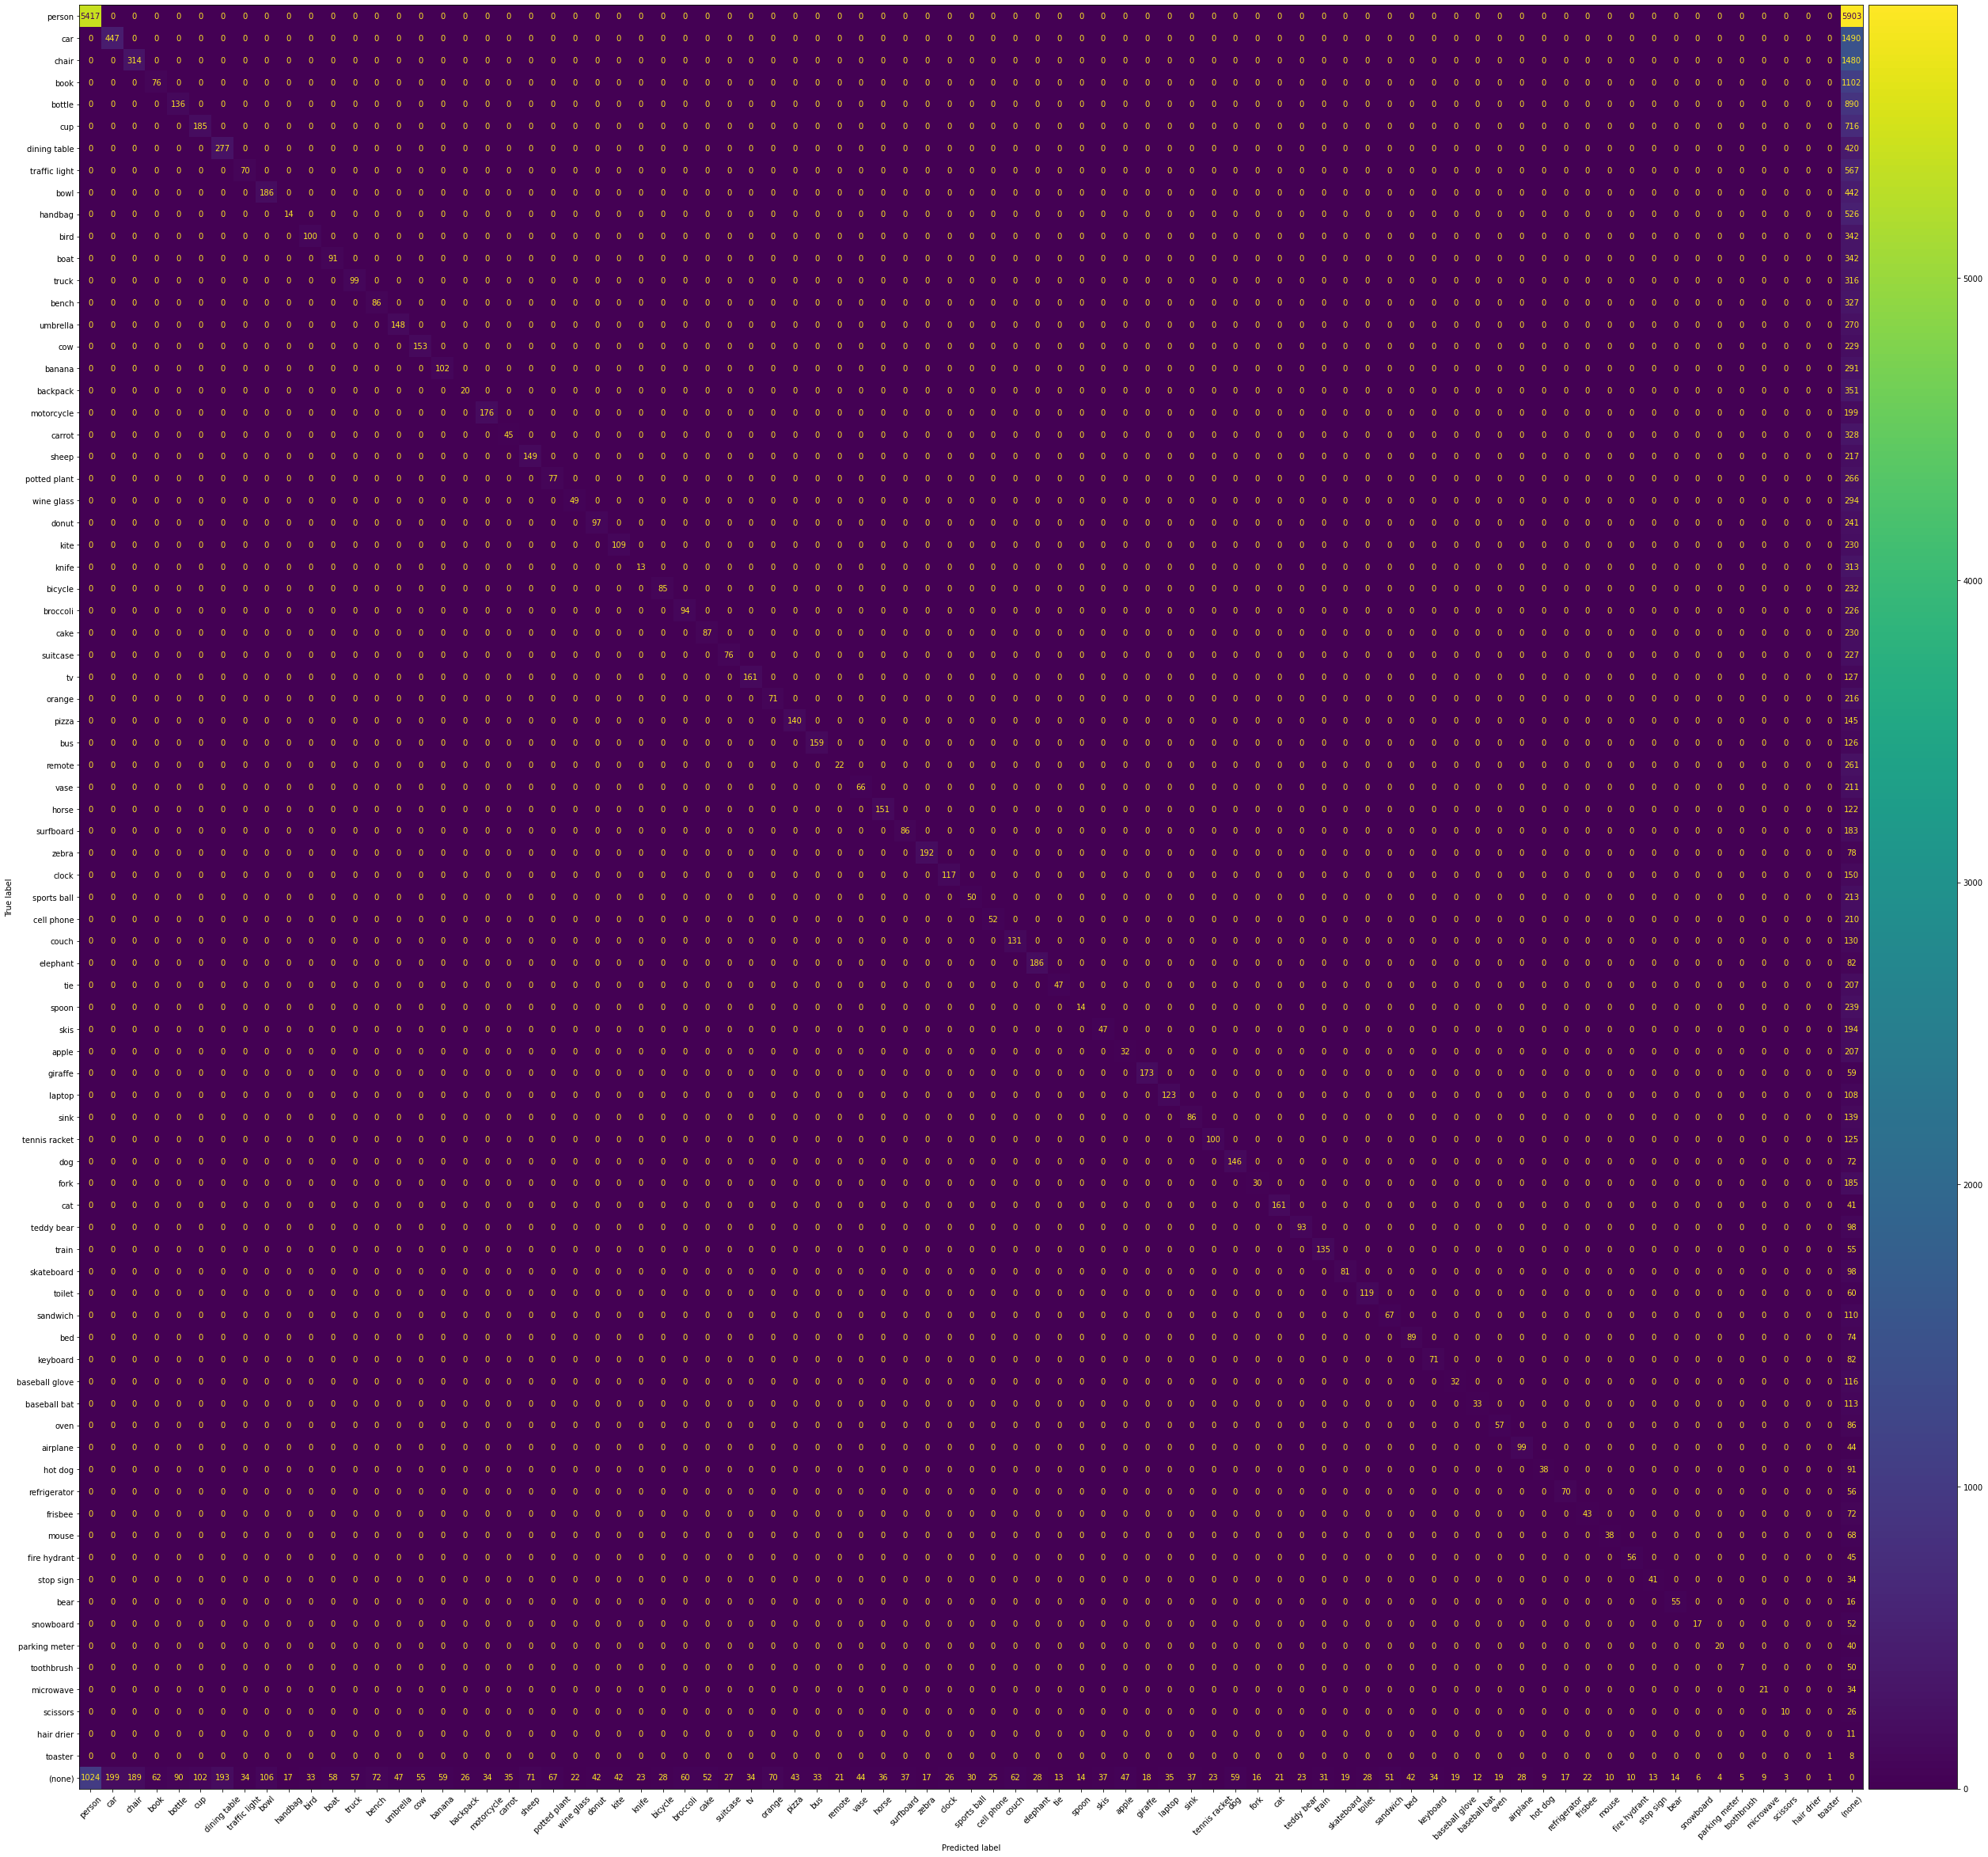

In [ ]:
plot = r_50.plot_confusion_matrix(classes=classes_sort[:], backend="matplotlib", figsize=(35, 35))
plot.show()

In [ ]:
plot = r_50.plot_confusion_matrix(classes=classes_sort[:10])
plot.show()

/usr/local/lib/python3.8/dist-packages/fiftyone/core/plots/plotly.py:1782: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://voxel51.com/docs/fiftyone/user_guide/plots.html#working-in-notebooks for more information.



### TP, FP, FN, IOU

In [ ]:
eval_patches = c_50.to_evaluation_patches("eval")

print(eval_patches.count_values("type"))

{'fn': 24376, 'tp': 12405, 'fp': 4181}


In [ ]:
iou = eval_patches.count_values('iou')
x = list(iou.items())
sum_iou = 0.0
for i,v in x:
  if not i:
    continue
  sum_iou += (i * v)

print('IOU Score', sum_iou / sum(iou.values()))


IOU Score 0.24389927446508025


## **Using ConfidenceTH = 0.75**

In [ ]:
c_75 = predictions_view.filter_labels("mobile_net", F("confidence") >= 0.75, only_matches=False)


In [ ]:
r_75 = c_75.evaluate_detections(
    "mobile_net",
    gt_field="ground_truth",
    eval_key="eval",
    compute_mAP=True,
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 5000/5000 [1.8m elapsed, 0s remaining, 37.8 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [1.8m elapsed, 0s remaining, 37.8 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 5000/5000 [1.0m elapsed, 0s remaining, 86.6 samples/s]        


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [1.0m elapsed, 0s remaining, 86.6 samples/s]        


#### mAP

In [ ]:
calc_map(r_75)

mAP :  0.18130362456035518
                precision    recall  f1-score   support

        person       0.93      0.40      0.56     11075
           car       0.87      0.17      0.28      1932
         chair       0.78      0.11      0.19      1791
          book       0.72      0.02      0.04      1165
        bottle       0.79      0.09      0.16      1025
           cup       0.81      0.15      0.25       899
  dining table       0.68      0.28      0.40       697
 traffic light       0.85      0.08      0.14       637
          bowl       0.83      0.22      0.35       628
       handbag       0.56      0.01      0.02       540
          bird       0.96      0.19      0.32       440
          boat       0.76      0.14      0.23       430
         truck       0.75      0.16      0.26       415
         bench       0.73      0.17      0.27       413
      umbrella       0.86      0.29      0.43       415
           cow       0.79      0.31      0.45       382
        banana      

#### Accuarcy, Precision, Recall

In [ ]:
d = r_75.metrics(classes_sort)
acc = d['accuracy']
pre = d['precision']
rec = d['recall']
fsc= d['fscore']

In [ ]:
print('accuracy : ', acc)
print('precision : ', pre)
print('recall : ', rec)
print('fscore : ', fsc)


accuracy :  0.2652539943180337
precision :  0.8716169921205893
recall :  0.2760388412715634
fscore :  0.4192897165458141


#### Confusion Matrix

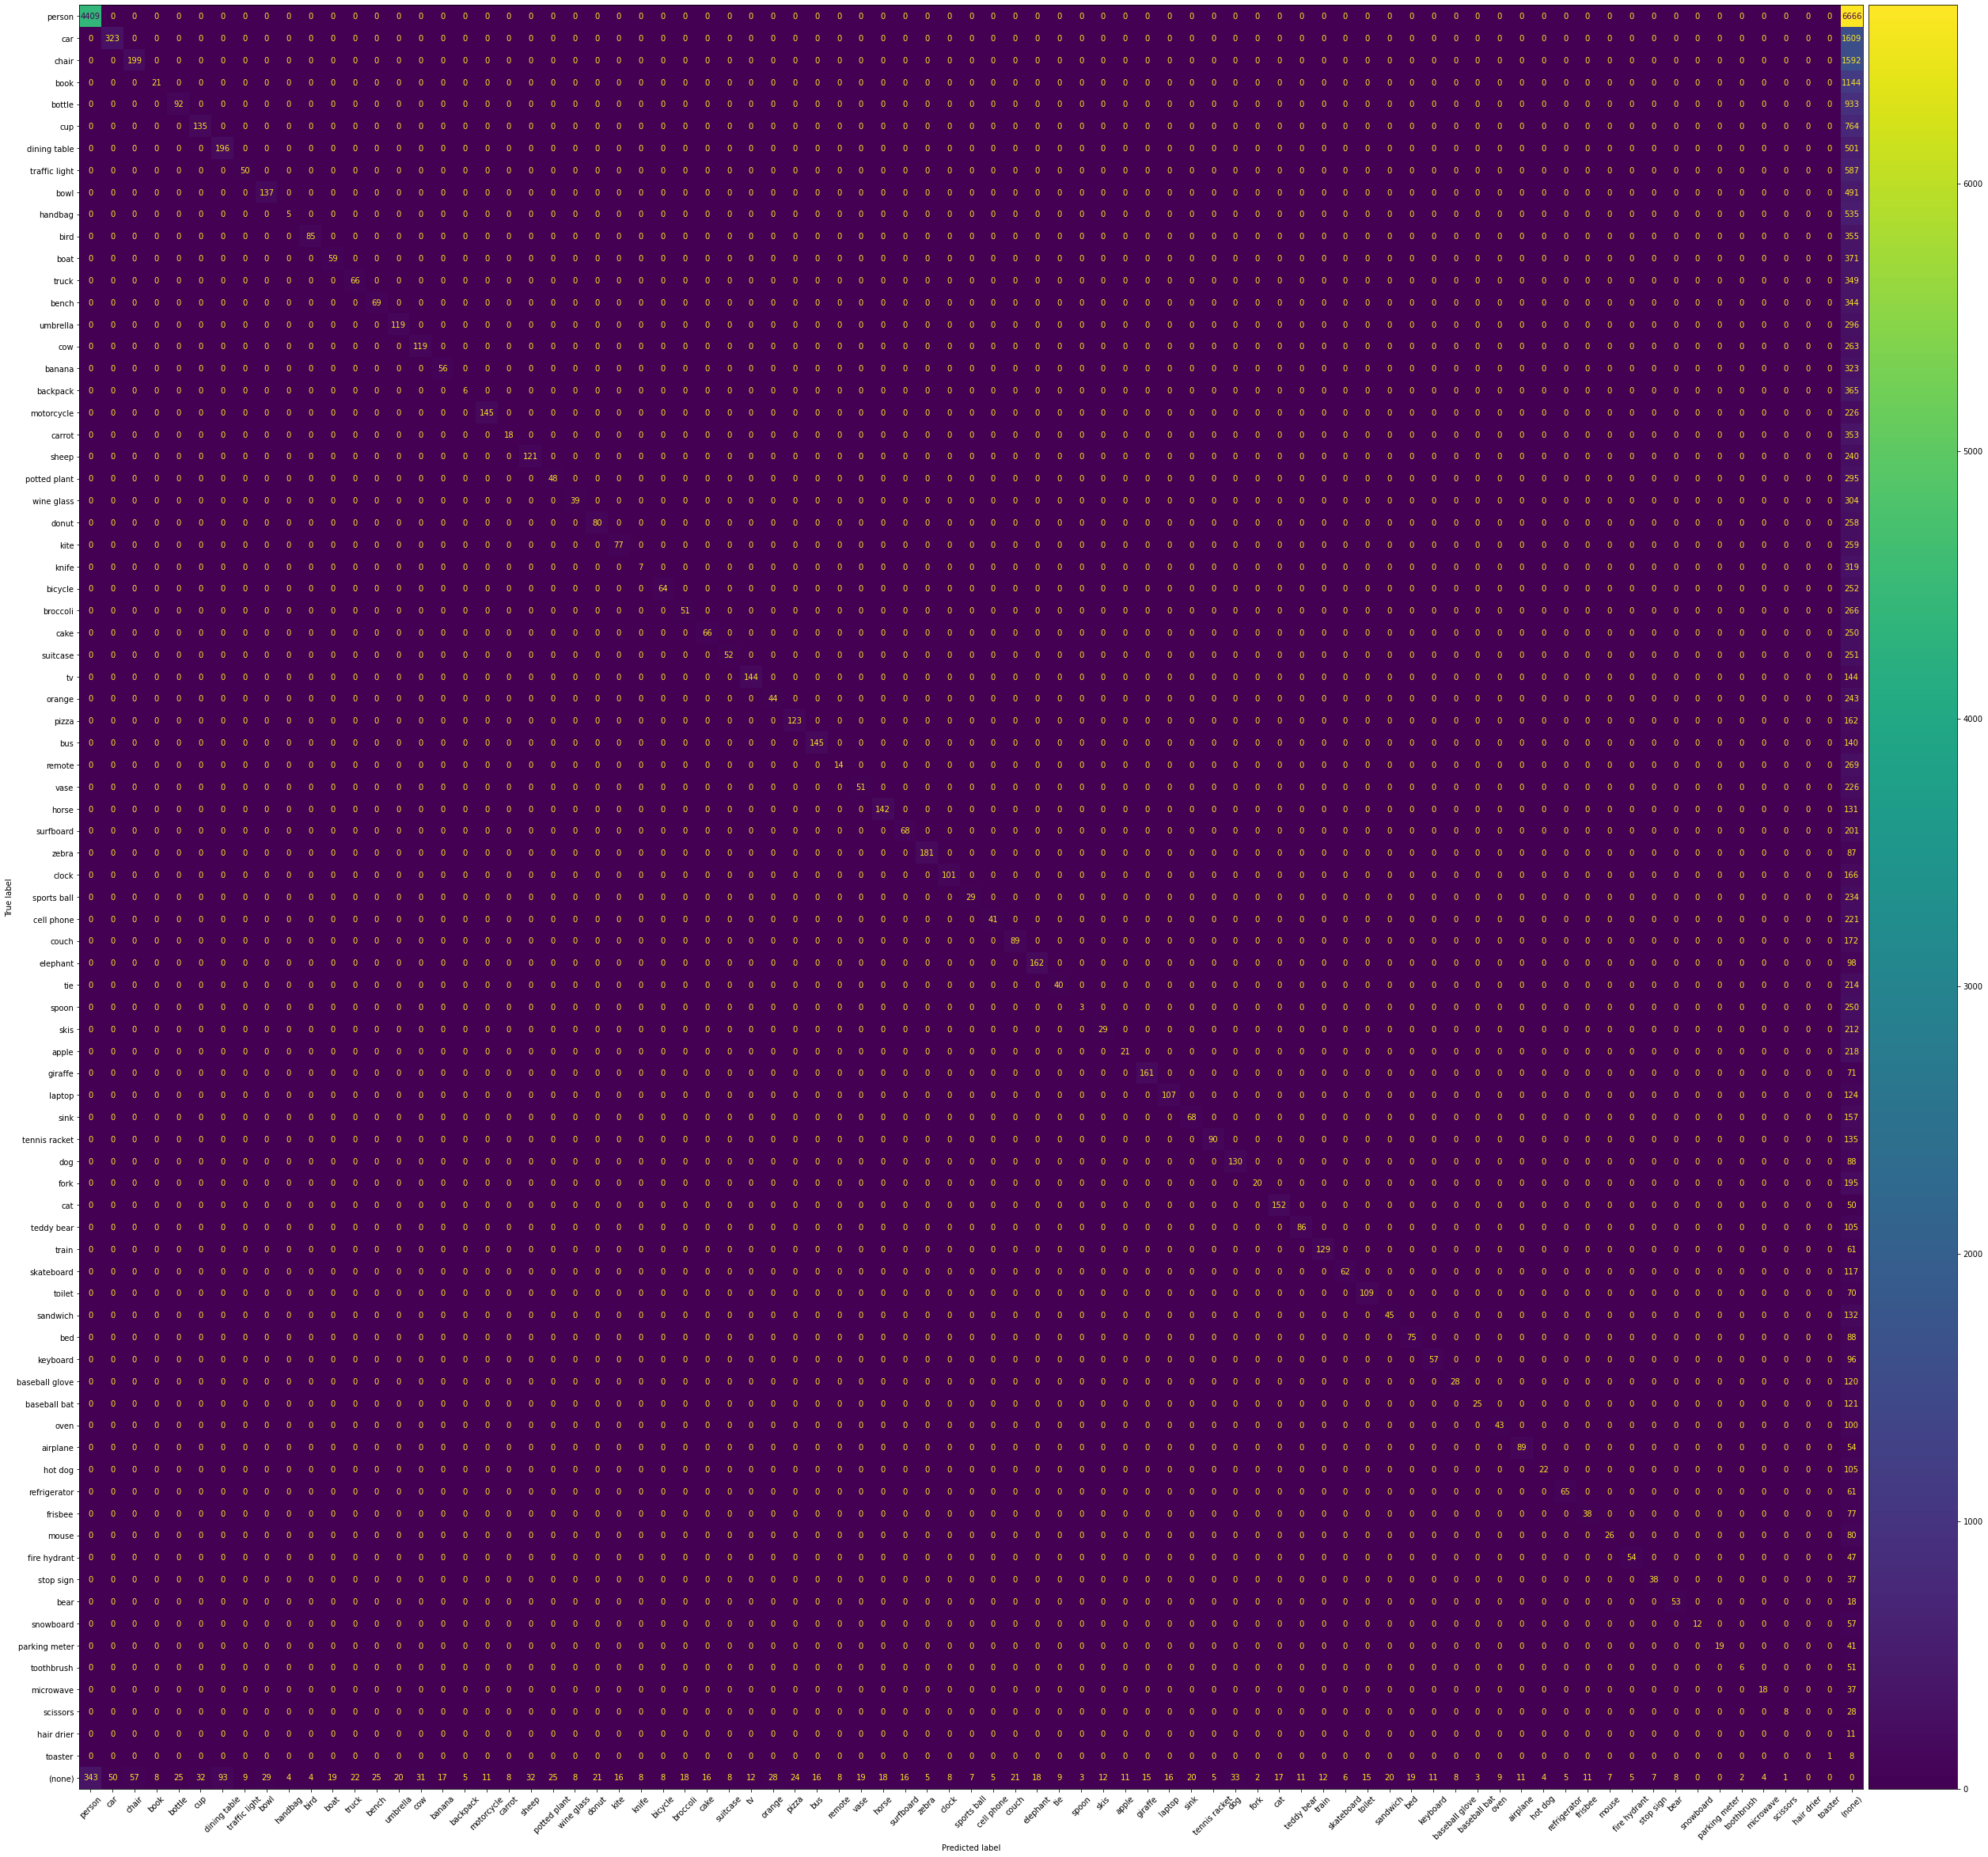

In [ ]:
plot = r_75.plot_confusion_matrix(classes=classes_sort[:], backend="matplotlib", figsize=(35, 35))
plot.show()

In [ ]:
plot = r_75.plot_confusion_matrix(classes=classes_sort[:10])
plot.show()

/usr/local/lib/python3.8/dist-packages/fiftyone/core/plots/plotly.py:1782: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://voxel51.com/docs/fiftyone/user_guide/plots.html#working-in-notebooks for more information.



### TP, FP, FN, IOU

In [ ]:
eval_patches = c_75.to_evaluation_patches("eval")

print(eval_patches.count_values("type"))

{'fn': 26691, 'tp': 10090, 'fp': 1499}


In [ ]:
iou = eval_patches.count_values('iou')
x = list(iou.items())
sum_iou = 0.0
for i,v in x:
  if not i:
    continue
  sum_iou += (i * v)

print('IOU Score', sum_iou / sum(iou.values()))


IOU Score 0.21701935702101163


In [ ]:
sum(iou.values())

38280

## **Using Confidence TH = 0.9**

In [ ]:
c_90 = predictions_view.filter_labels("mobile_net", F("confidence") >= 0.90, only_matches=False)


In [ ]:
r_90 = c_90.evaluate_detections(
    "mobile_net",
    gt_field="ground_truth",
    eval_key="eval",
    compute_mAP=True,
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 5000/5000 [1.6m elapsed, 0s remaining, 45.1 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [1.6m elapsed, 0s remaining, 45.1 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 5000/5000 [56.2s elapsed, 0s remaining, 90.1 samples/s]       


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [56.2s elapsed, 0s remaining, 90.1 samples/s]       


#### mAP

In [ ]:
calc_map(r_90)

mAP :  0.15501029854496587
                precision    recall  f1-score   support

        person       0.96      0.33      0.49     11015
           car       0.93      0.10      0.18      1932
         chair       0.90      0.06      0.12      1791
          book       0.80      0.00      0.01      1161
        bottle       0.93      0.05      0.10      1025
           cup       0.90      0.11      0.19       899
  dining table       0.80      0.17      0.28       697
 traffic light       0.88      0.05      0.09       637
          bowl       0.89      0.11      0.20       626
       handbag       1.00      0.00      0.01       540
          bird       0.99      0.16      0.28       440
          boat       0.78      0.09      0.16       430
         truck       0.89      0.12      0.20       415
         bench       0.82      0.13      0.23       413
      umbrella       0.90      0.19      0.31       414
           cow       0.87      0.25      0.39       380
        banana      

#### Accuarcy, Precision, Recall

In [ ]:
d = r_90.metrics(classes_sort)
acc = d['accuracy']
pre = d['precision']
rec = d['recall']
fsc= d['fscore']

In [ ]:
print('accuracy : ', acc)
print('precision : ', pre)
print('recall : ', rec)
print('fscore : ', fsc)


accuracy :  0.21247657295850067
precision :  0.9348568736011309
recall :  0.21566975568660487
fscore :  0.35048359316345


#### Confusion Matrix

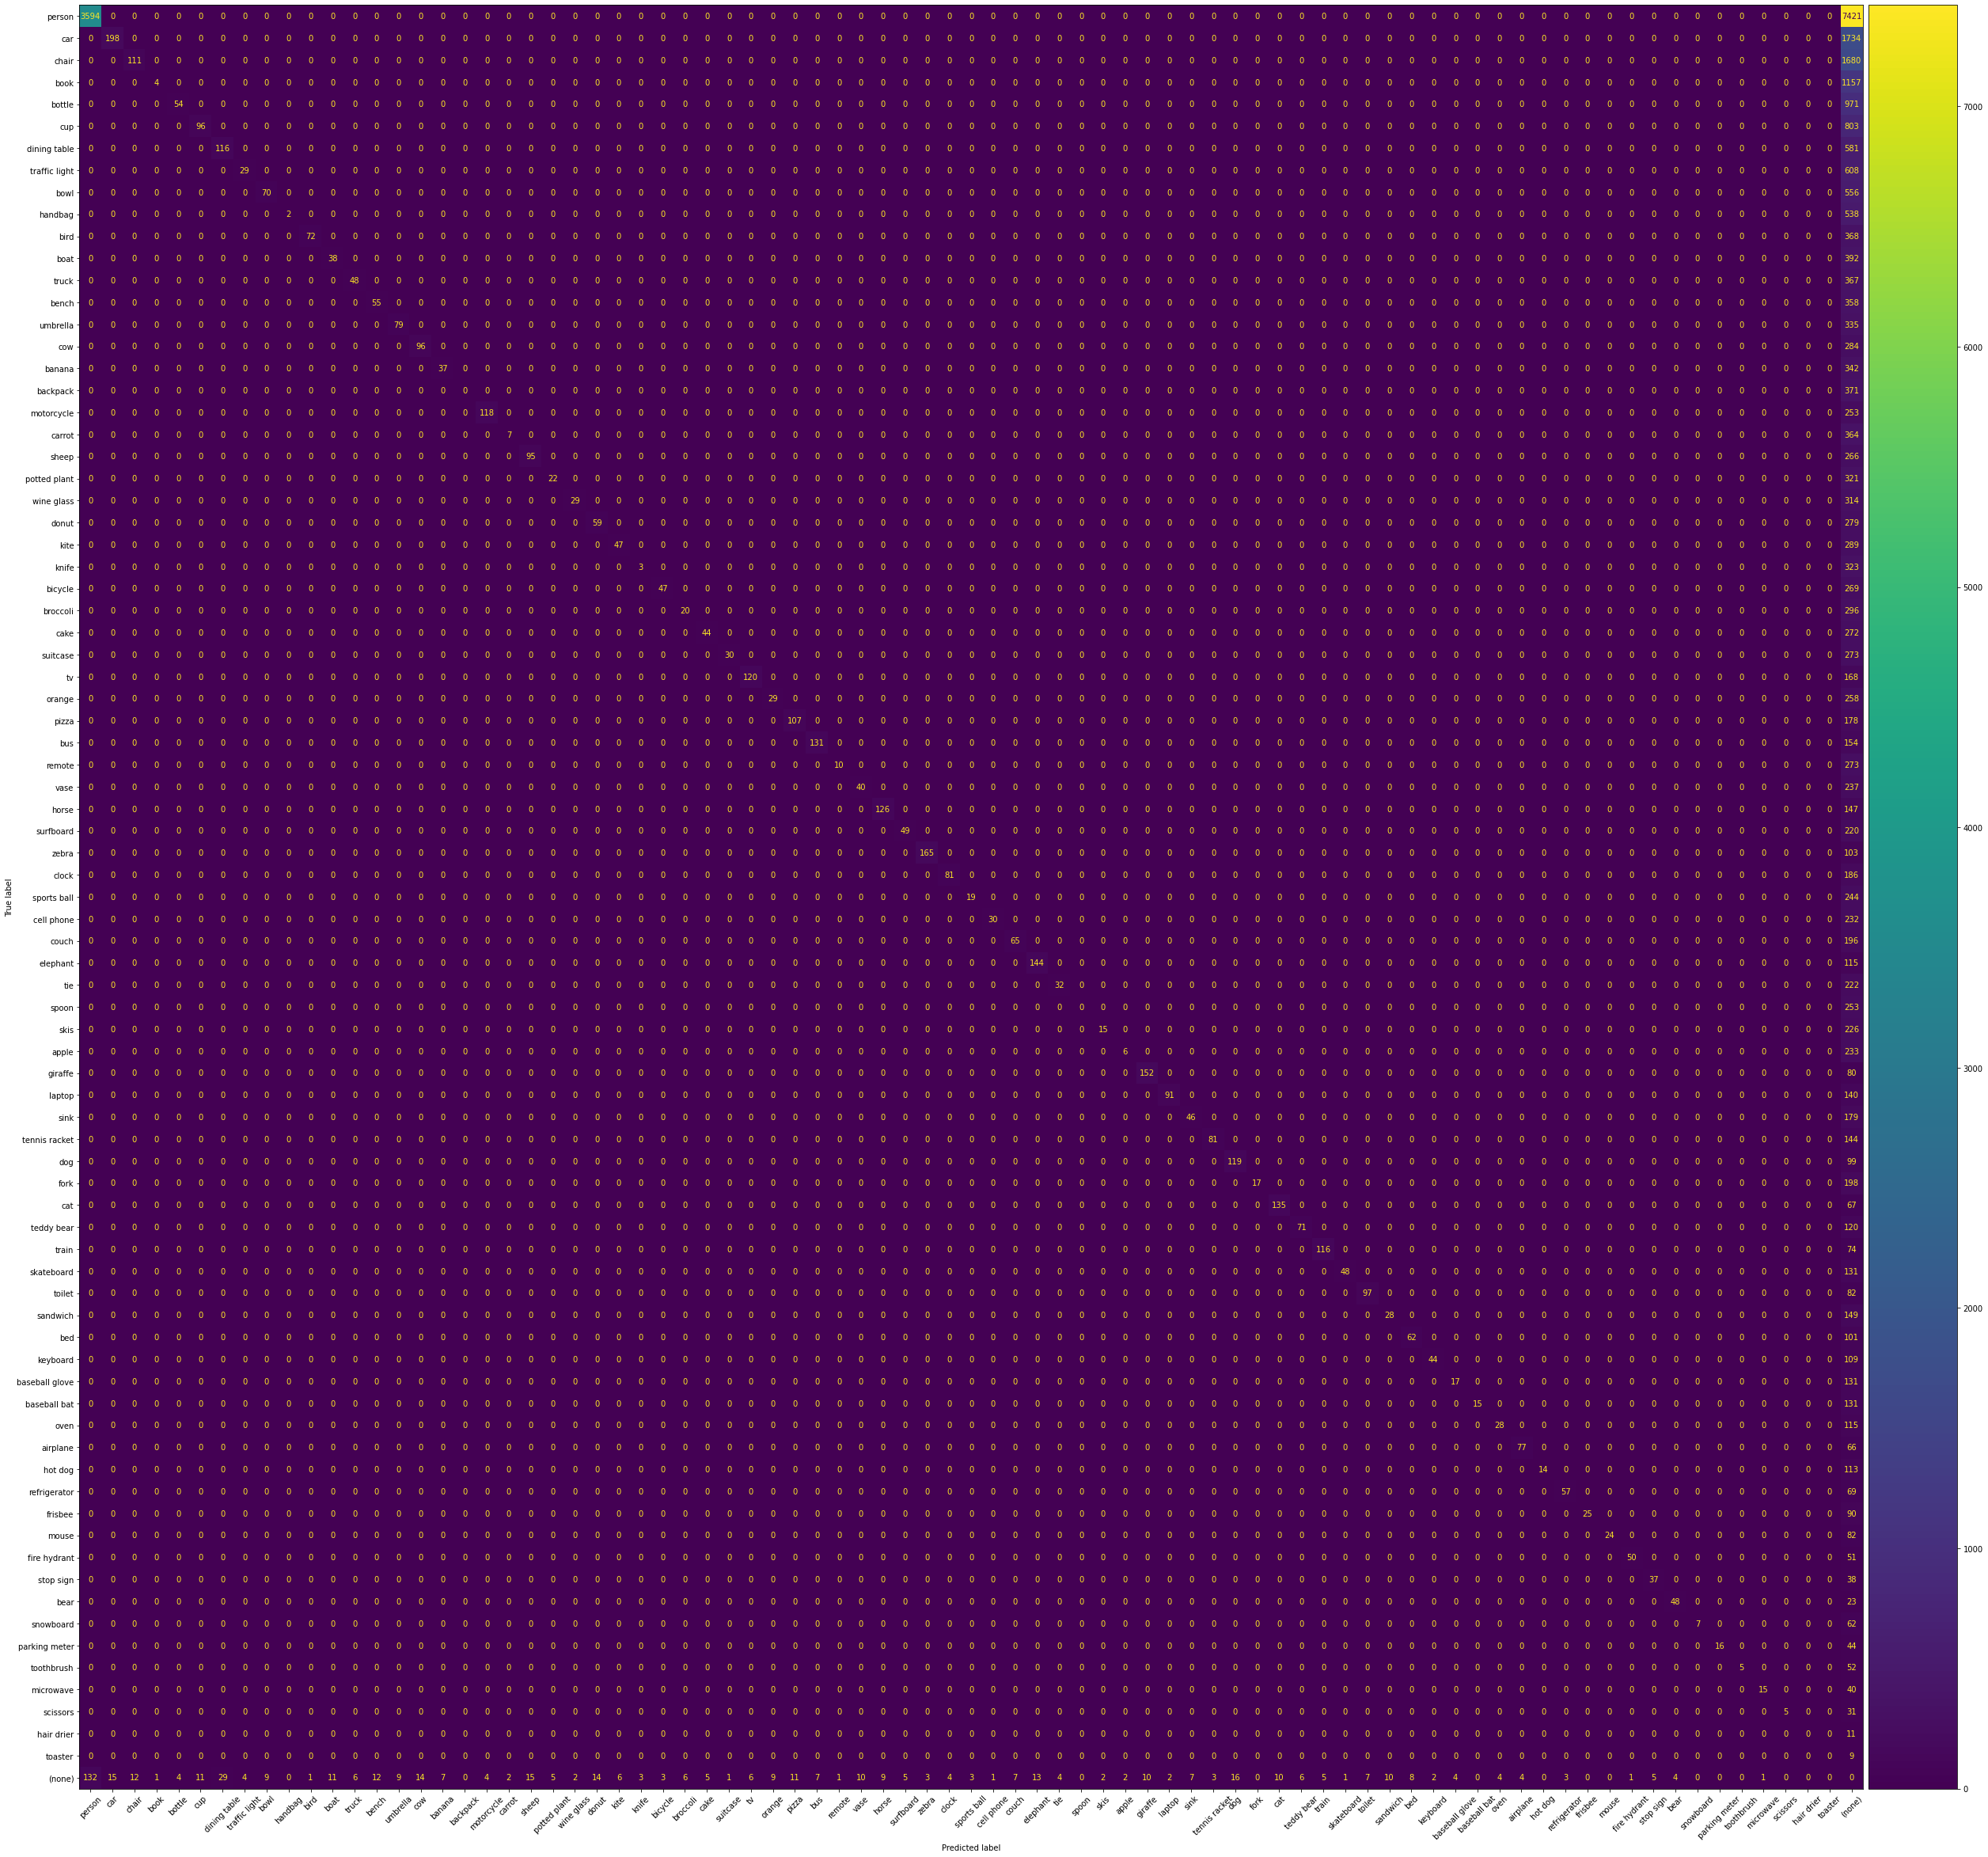

In [ ]:
plot = r_90.plot_confusion_matrix(classes=classes_sort[:], backend="matplotlib", figsize=(35, 35))
plot.show()

In [ ]:
plot = r_90.plot_confusion_matrix(classes=classes_sort[:10])
plot.show()

/usr/local/lib/python3.8/dist-packages/fiftyone/core/plots/plotly.py:1782: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://voxel51.com/docs/fiftyone/user_guide/plots.html#working-in-notebooks for more information.



### TP, FP, FN, IOU

In [ ]:
eval_patches = c_90.to_evaluation_patches("eval")

print(eval_patches.count_values("type"))

{'fp': 553, 'tp': 7920, 'fn': 28861}


In [ ]:
iou = eval_patches.count_values('iou')
x = list(iou.items())
sum_iou = 0.0
for i,v in x:
  if not i:
    continue
  sum_iou += (i * v)

print('IOU Score', sum_iou / sum(iou.values()))


IOU Score 0.17877693662678135


In [ ]:
sum(iou.values())

37334

# **SSD Model**

## **Result using Thershold = 0.1**

In [ ]:
c_10 = predictions_view.filter_labels("ssd_model", F("confidence") >= 0.1, only_matches=False)

In [ ]:
r_10 = c_10.evaluate_detections(
    "ssd_model",
    gt_field="ground_truth",
    eval_key="eval",
    compute_mAP=True,
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 5000/5000 [23.0m elapsed, 0s remaining, 2.4 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [23.0m elapsed, 0s remaining, 2.4 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 5000/5000 [3.3m elapsed, 0s remaining, 23.5 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [3.3m elapsed, 0s remaining, 23.5 samples/s]      


In [ ]:
counts = dataset.count_values("ground_truth.detections.label")
classes_sort = sorted(counts, key=counts.get, reverse=True)[:]

In [ ]:
def calc_map(result):
  print('mAP : ', result.mAP())
  result.print_report(classes=classes_sort)
  plot = result.plot_pr_curves(classes=classes_sort)
  plot.show()

#### mAP

In [ ]:
calc_map(r_10)

mAP :  0.20825769131277921
                precision    recall  f1-score   support

        person       0.39      0.80      0.52     22051
           car       0.16      0.41      0.23      2177
         chair       0.14      0.46      0.21      2143
          book       0.40      0.69      0.51      2927
        bottle       0.32      0.51      0.39      1575
           cup       0.32      0.26      0.28       907
  dining table       0.14      0.56      0.23       698
 traffic light       0.01      0.27      0.03       664
          bowl       0.28      0.44      0.34       641
       handbag       0.08      0.09      0.08       540
          bird       0.23      0.72      0.35      1122
          boat       0.07      0.60      0.13       638
         truck       0.25      0.39      0.30       415
         bench       0.06      0.31      0.11       413
      umbrella       0.18      0.68      0.29       630
           cow       0.33      0.75      0.45       740
        banana      

#### Accuarcy, Precision, Recall

In [ ]:
d = r_10.metrics(classes_sort)
acc = d['accuracy']
pre = d['precision']
rec = d['recall']
fsc= d['fscore']

In [ ]:
print('accuracy : ', acc)
print('precision : ', pre)
print('recall : ', rec)
print('fscore : ', fsc)


accuracy :  0.21597565075825945
precision :  0.24447322912980485
recall :  0.649466981215744
fscore :  0.3552302229466209


#### Confusion Matrix

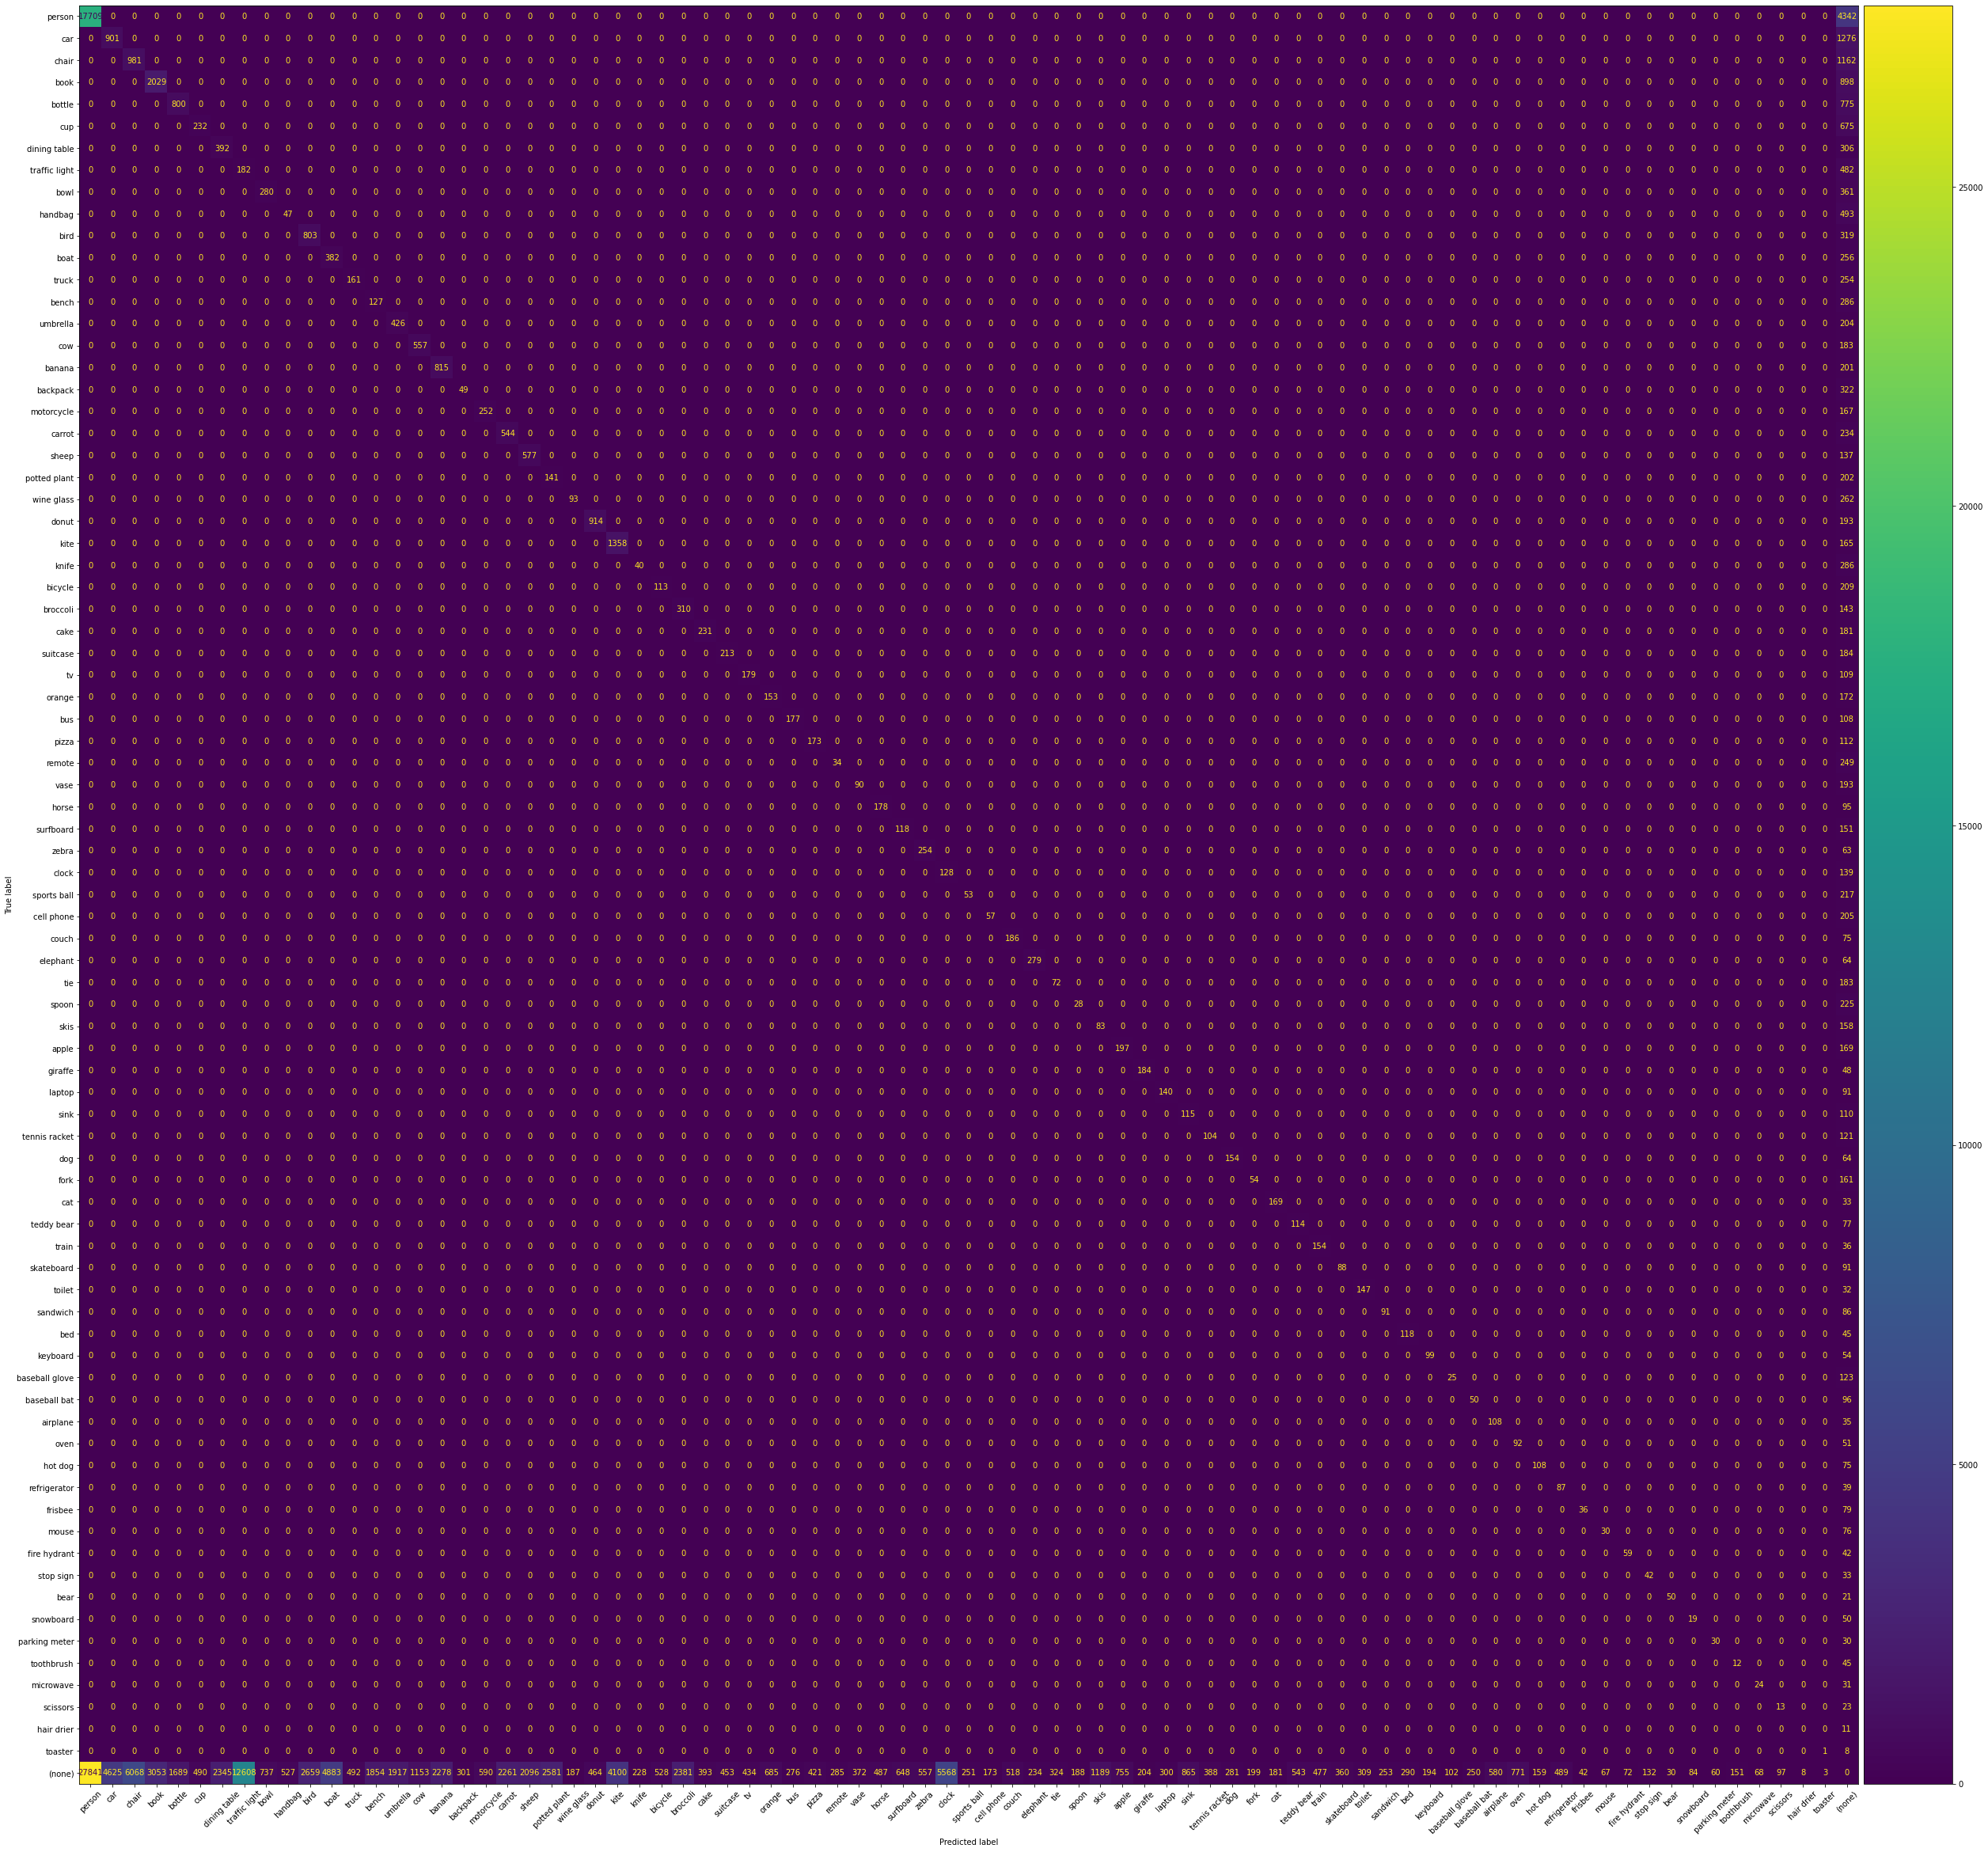

In [ ]:
plot = r_10.plot_confusion_matrix(classes=classes_sort[:], backend="matplotlib", figsize=(35, 35))
plot.show()

In [ ]:
plot = r_10.plot_confusion_matrix(classes=classes_sort[:10])
plot.show()

/usr/local/lib/python3.8/dist-packages/fiftyone/core/plots/plotly.py:1782: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://voxel51.com/docs/fiftyone/user_guide/plots.html#working-in-notebooks for more information.



### TP, FP, FN, IOU

In [ ]:
eval_patches = c_10.to_evaluation_patches("eval")

print(eval_patches.count_values("type"))

{'fn': 19762, 'tp': 17019, 'fp': 113156}


In [ ]:
iou = eval_patches.count_values('iou')
x = list(iou.items())
sum_iou = 0.0
for i,v in x:
  if not i:
    continue
  sum_iou += (i * v)

print('IOU Score', sum_iou / sum(iou.values()))


IOU Score 0.08685963872697383


In [ ]:
 sum(iou.values())

149937

## **Using Confidence TH = 0.5**

In [ ]:
c_50 = predictions_view.filter_labels("ssd_model", F("confidence") >= 0.5, only_matches=False)

In [ ]:
r_50 = c_50.evaluate_detections(
    "ssd_model",
    gt_field="ground_truth",
    eval_key="eval",
    compute_mAP=True,
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 5000/5000 [2.0m elapsed, 0s remaining, 51.4 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [2.0m elapsed, 0s remaining, 51.4 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 5000/5000 [58.5s elapsed, 0s remaining, 90.9 samples/s]       


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [58.5s elapsed, 0s remaining, 90.9 samples/s]       


#### mAP

In [ ]:
calc_map(r_50)

mAP :  0.16637561326049255
                precision    recall  f1-score   support

        person       0.92      0.34      0.49     11025
           car       0.74      0.11      0.19      1933
         chair       0.75      0.12      0.20      1791
          book       0.65      0.01      0.03      1163
        bottle       0.80      0.07      0.13      1025
           cup       0.68      0.14      0.23       899
  dining table       0.67      0.31      0.42       697
 traffic light       0.75      0.03      0.06       637
          bowl       0.70      0.21      0.33       626
       handbag       0.46      0.01      0.02       540
          bird       0.93      0.13      0.23       440
          boat       0.69      0.10      0.17       430
         truck       0.76      0.22      0.34       415
         bench       0.69      0.16      0.26       413
      umbrella       0.83      0.25      0.39       413
           cow       0.82      0.26      0.40       380
        banana      

#### Accuarcy, Precision, Recall

In [ ]:
d = r_50.metrics(classes_sort)
acc = d['accuracy']
pre = d['precision']
rec = d['recall']
fsc= d['fscore']

In [ ]:
print('accuracy : ', acc)
print('precision : ', pre)
print('recall : ', rec)
print('fscore : ', fsc)


accuracy :  0.2311561697824565
precision :  0.8354418517477274
recall :  0.24218304311211322
fscore :  0.37551071985173334


#### Confusion Matrix

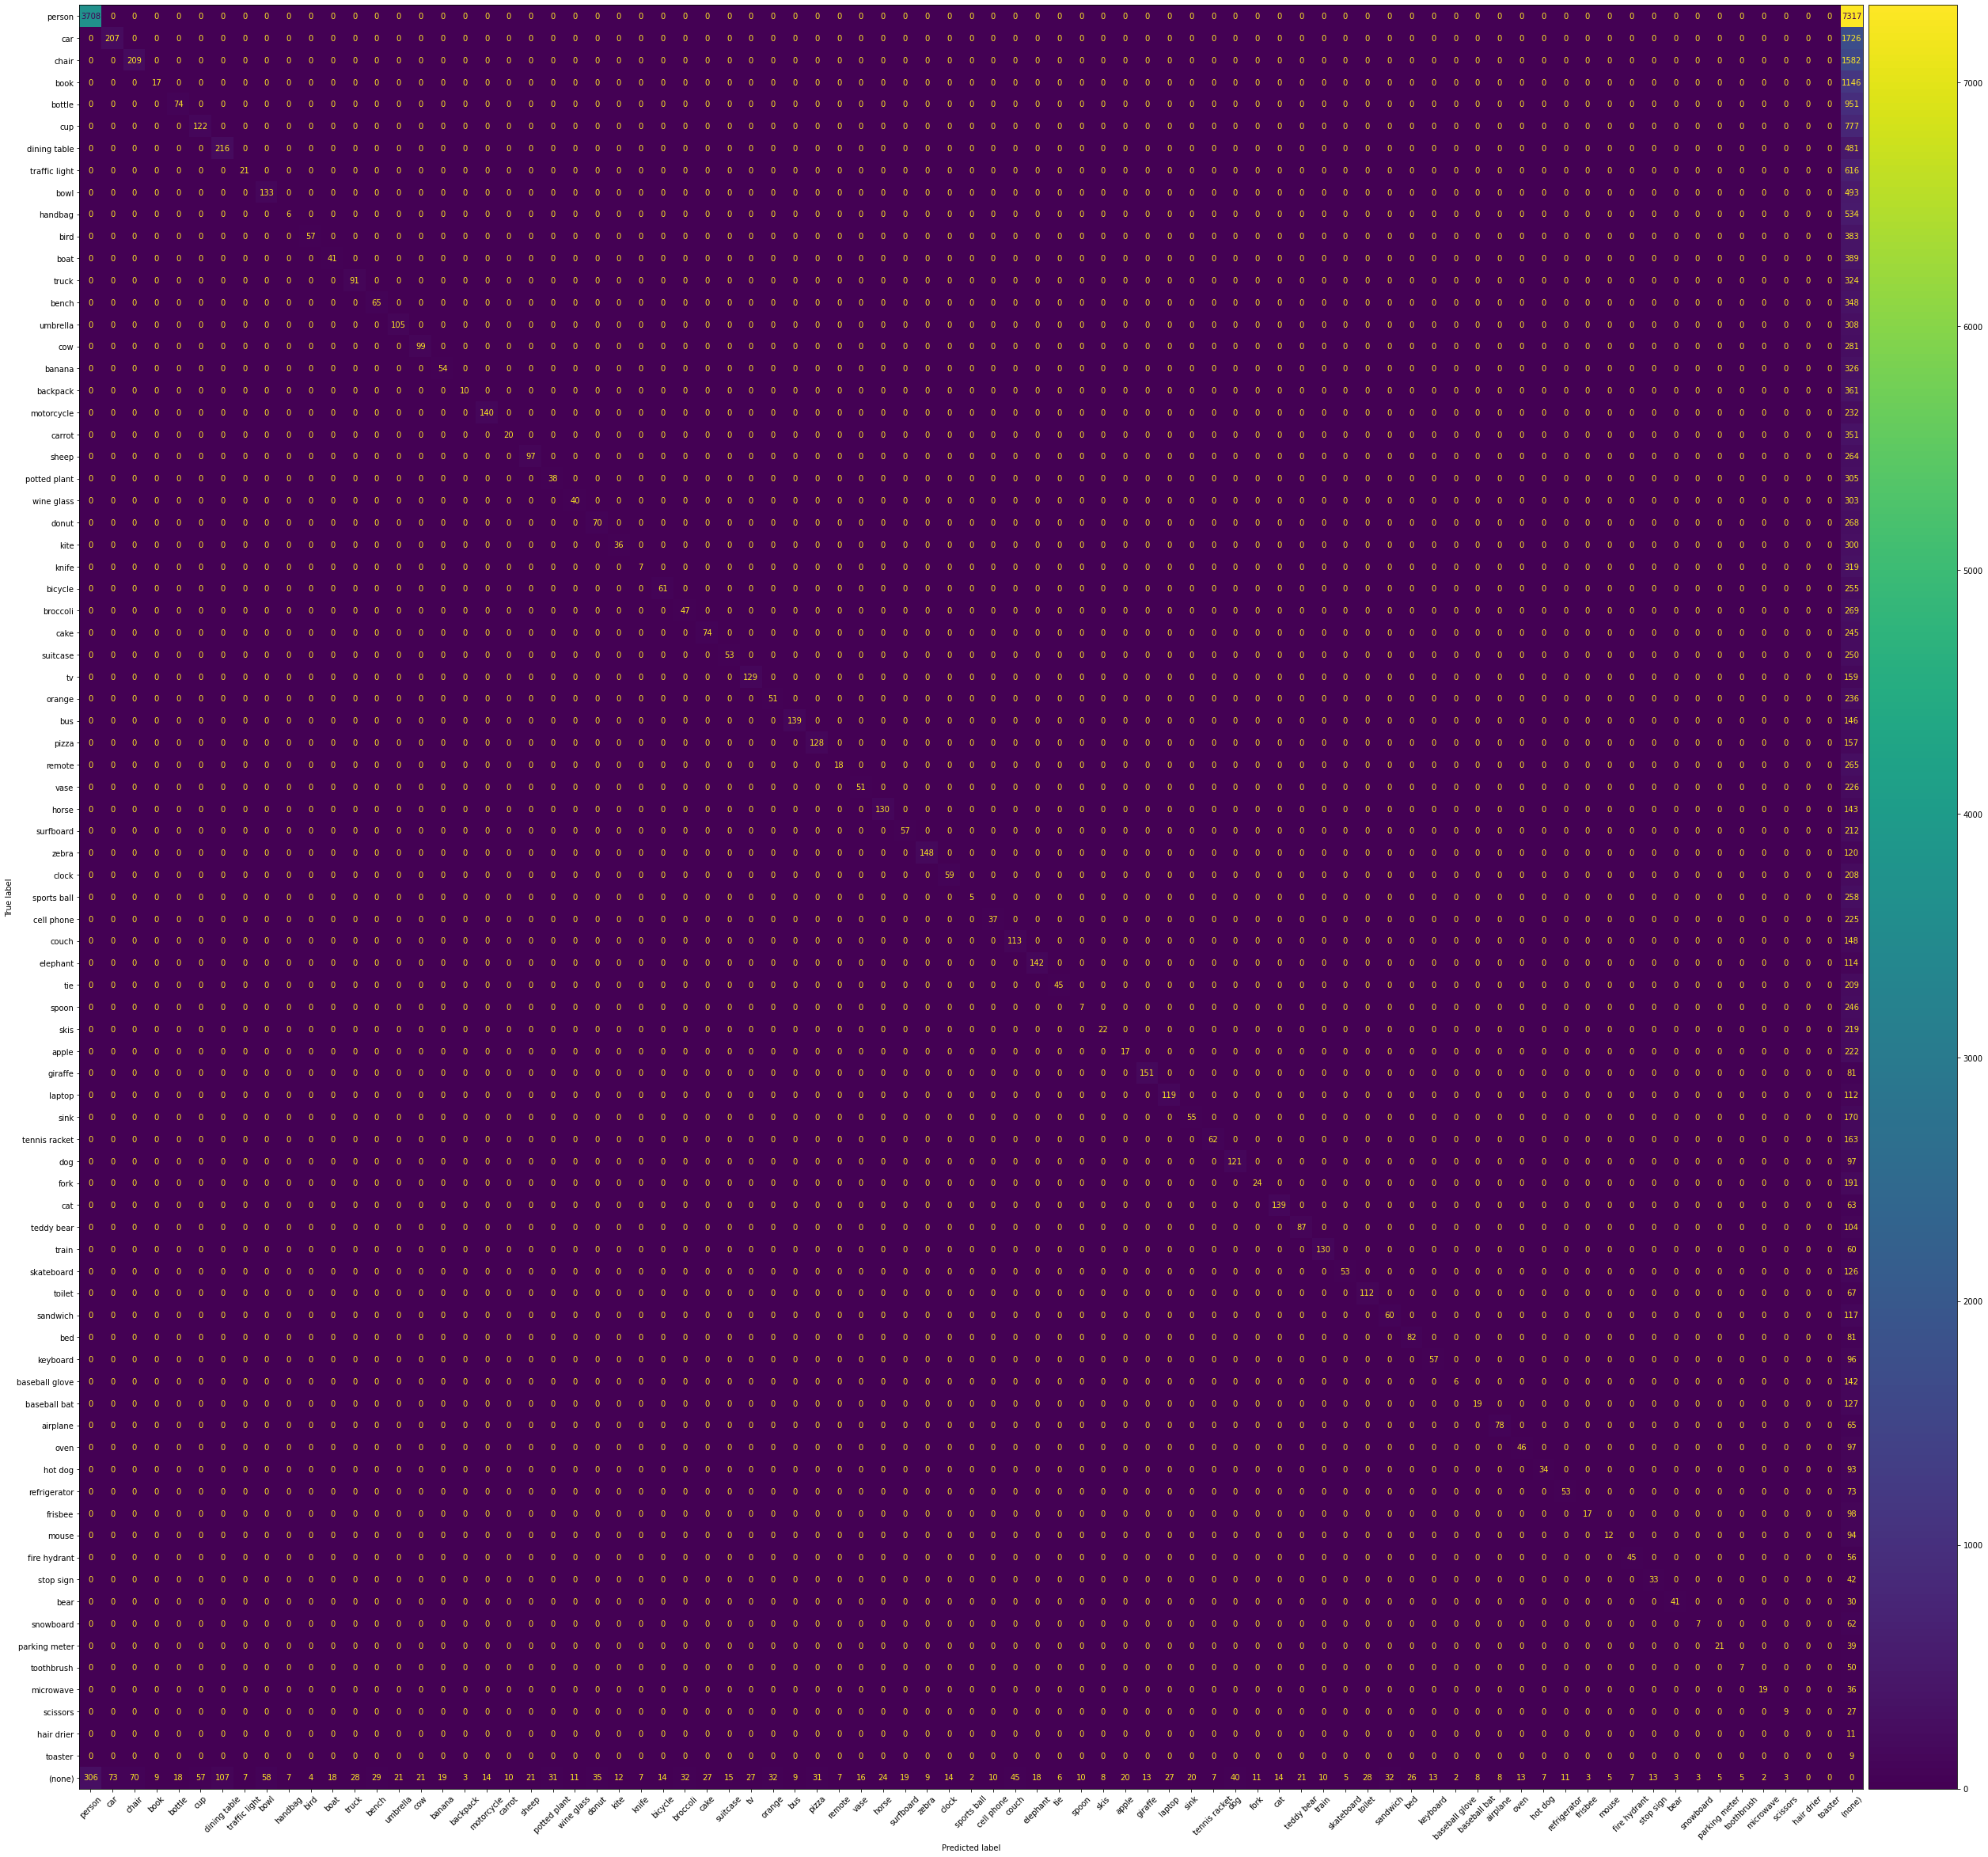

In [ ]:
plot = r_50.plot_confusion_matrix(classes=classes_sort[:], backend="matplotlib", figsize=(35, 35))
plot.show()

In [ ]:
plot = r_50.plot_confusion_matrix(classes=classes_sort[:10])
plot.show()

/usr/local/lib/python3.8/dist-packages/fiftyone/core/plots/plotly.py:1782: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://voxel51.com/docs/fiftyone/user_guide/plots.html#working-in-notebooks for more information.



### TP, FP, FN, IOU

In [ ]:
eval_patches = c_50.to_evaluation_patches("eval")

print(eval_patches.count_values("type"))

{'tp': 8885, 'fp': 1756, 'fn': 27896}


In [ ]:
iou = eval_patches.count_values('iou')
x = list(iou.items())
sum_iou = 0.0
for i,v in x:
  if not i:
    continue
  sum_iou += (i * v)

print('IOU Score', sum_iou / sum(iou.values()))


IOU Score 0.1921488899346016


## **Using ConfidenceTH = 0.75**

In [ ]:
c_75 = predictions_view.filter_labels("ssd_model", F("confidence") >= 0.75, only_matches=False)


In [ ]:
r_75 = c_75.evaluate_detections(
    "ssd_model",
    gt_field="ground_truth",
    eval_key="eval",
    compute_mAP=True,
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 5000/5000 [1.6m elapsed, 0s remaining, 58.2 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [1.6m elapsed, 0s remaining, 58.2 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 5000/5000 [56.6s elapsed, 0s remaining, 102.1 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [56.6s elapsed, 0s remaining, 102.1 samples/s]      


#### mAP

In [ ]:
calc_map(r_75)

mAP :  0.14148950014812892
                precision    recall  f1-score   support

        person       0.97      0.27      0.42     11005
           car       0.87      0.08      0.14      1932
         chair       0.92      0.07      0.13      1791
          book       0.60      0.00      0.01      1161
        bottle       0.93      0.05      0.09      1025
           cup       0.84      0.10      0.18       899
  dining table       0.75      0.19      0.31       697
 traffic light       0.71      0.02      0.04       637
          bowl       0.83      0.15      0.25       626
       handbag       1.00      0.00      0.01       540
          bird       0.98      0.11      0.20       440
          boat       0.85      0.07      0.12       430
         truck       0.85      0.14      0.25       415
         bench       0.80      0.12      0.21       413
      umbrella       0.87      0.16      0.28       413
           cow       0.91      0.22      0.35       380
        banana      

#### Accuarcy, Precision, Recall

In [ ]:
d = r_75.metrics(classes_sort)
acc = d['accuracy']
pre = d['precision']
rec = d['recall']
fsc= d['fscore']

In [ ]:
print('accuracy : ', acc)
print('precision : ', pre)
print('recall : ', rec)
print('fscore : ', fsc)


accuracy :  0.18325083612040133
precision :  0.9204408009676118
recall :  0.18620014680694885
fscore :  0.3097413169319826


#### Confusion Matrix

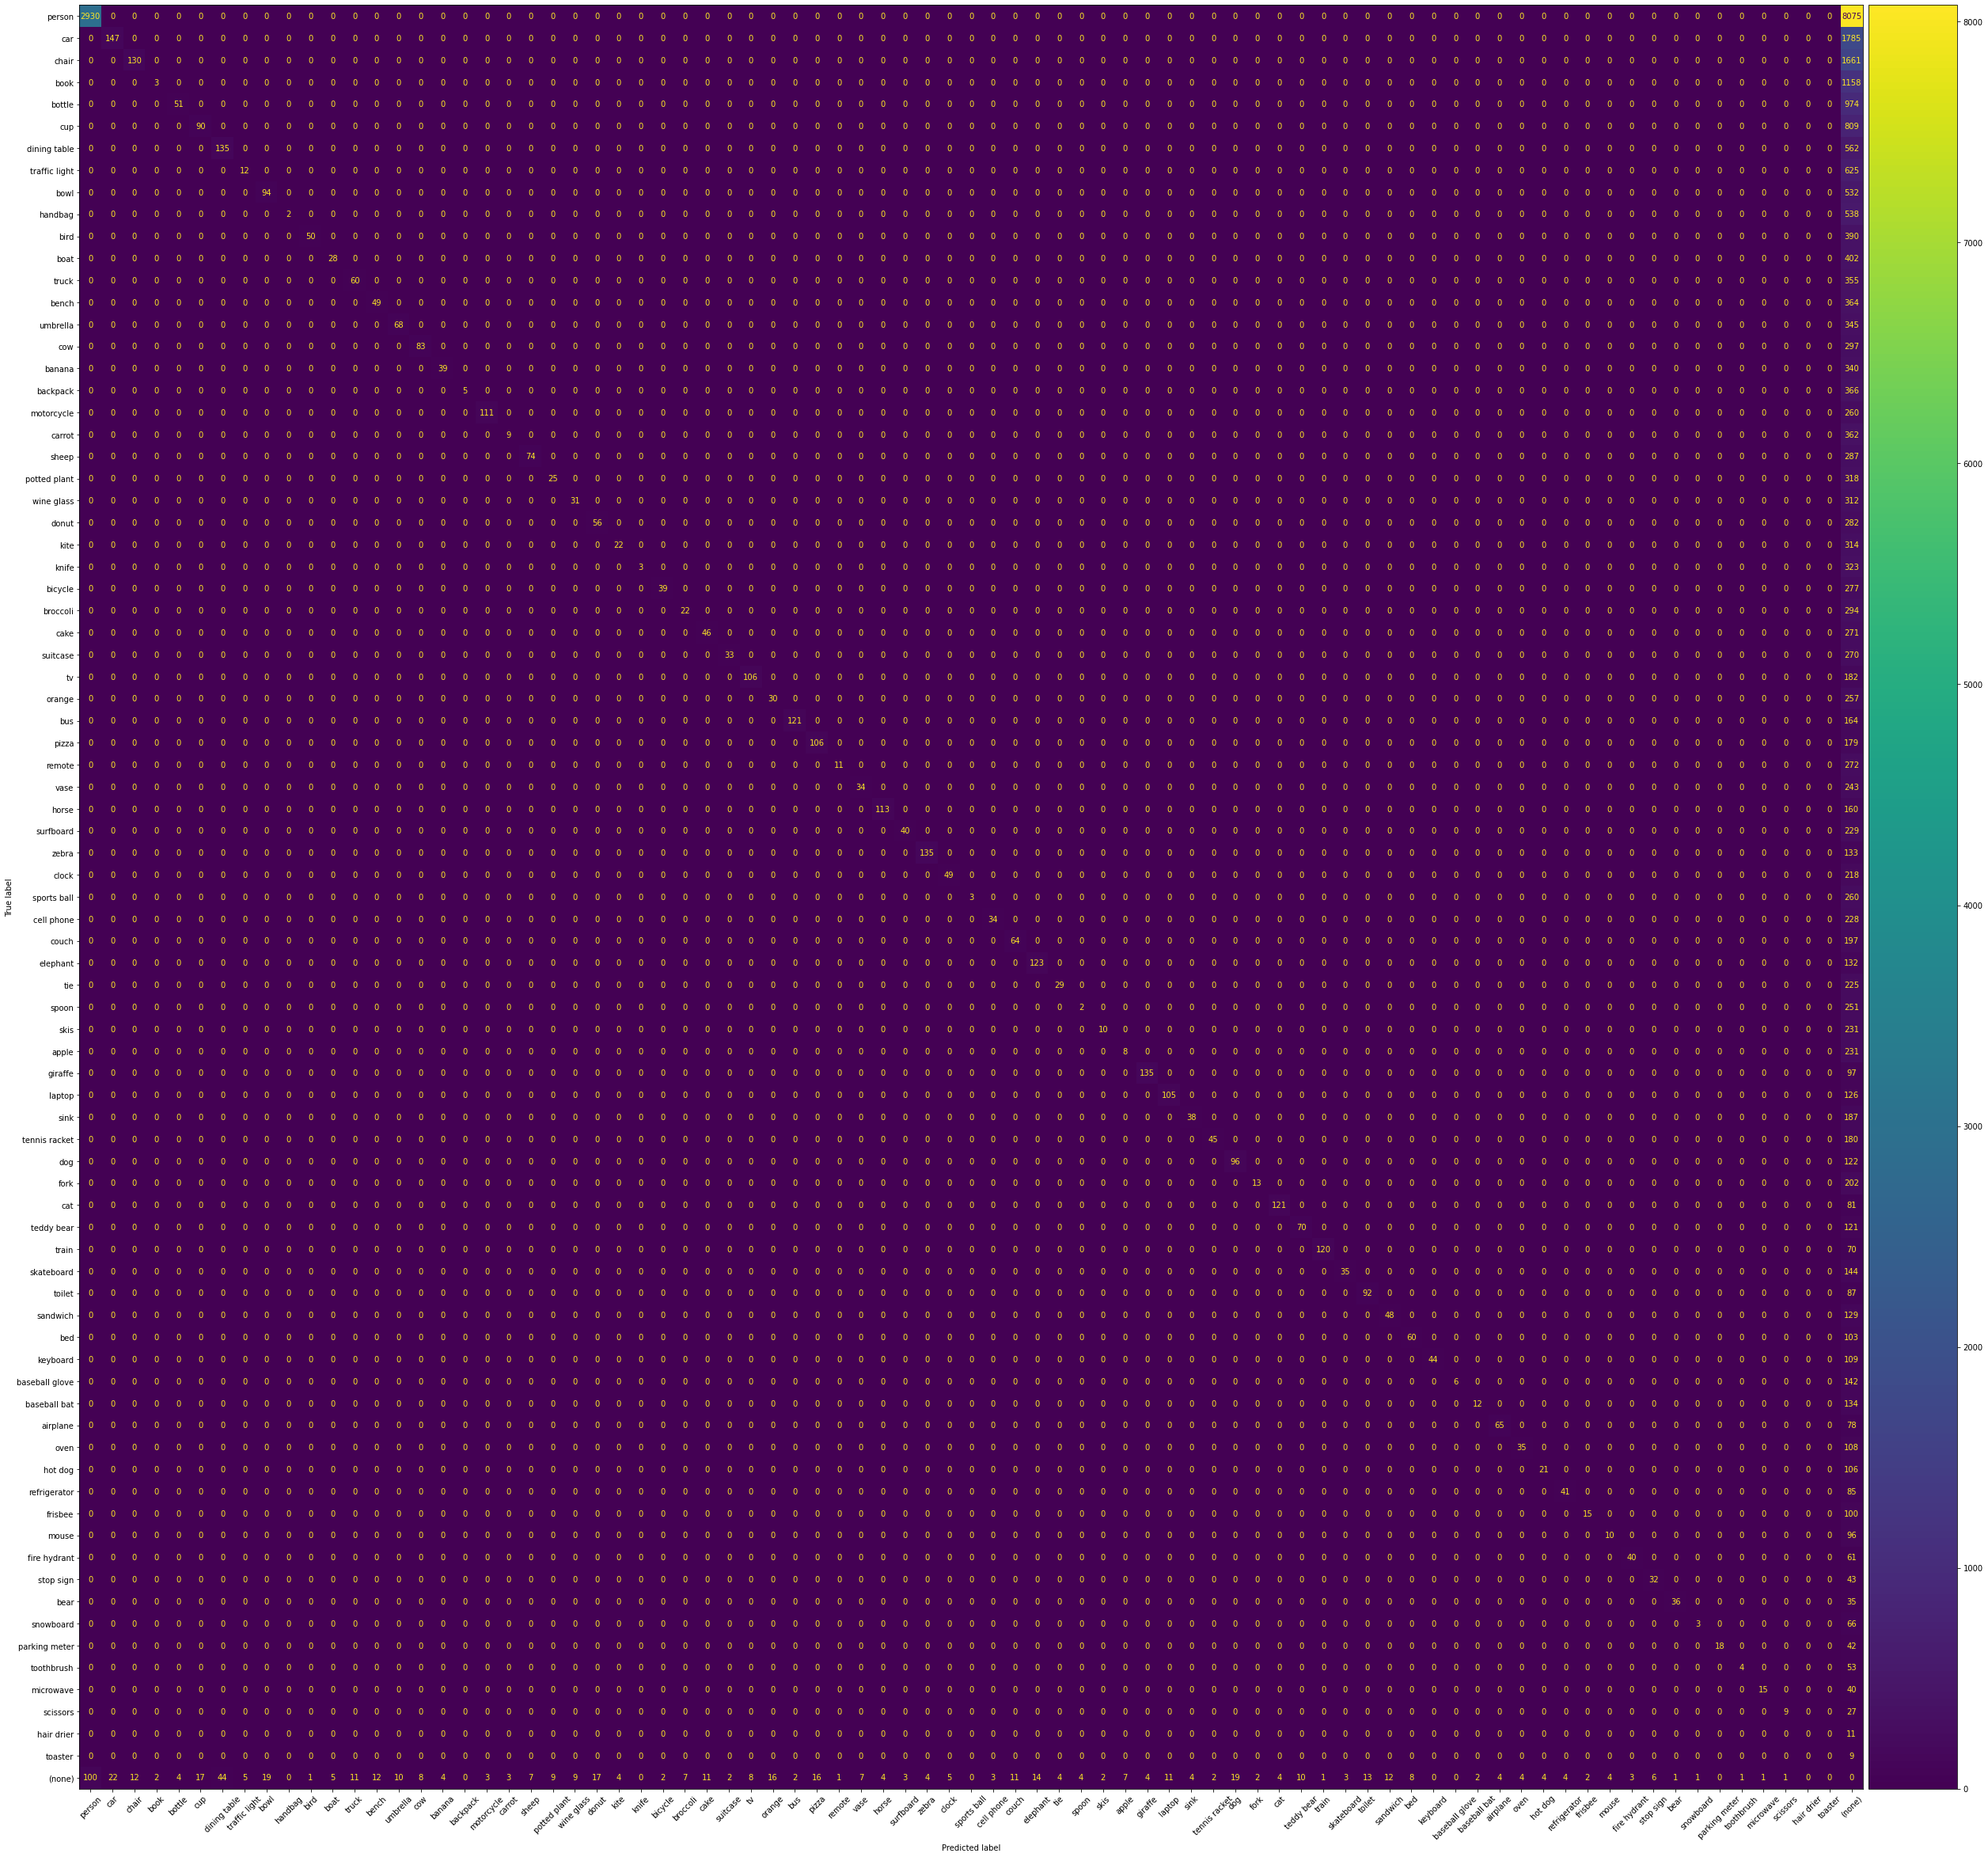

In [ ]:
plot = r_75.plot_confusion_matrix(classes=classes_sort[:], backend="matplotlib", figsize=(35, 35))
plot.show()

In [ ]:
plot = r_75.plot_confusion_matrix(classes=classes_sort[:10])
plot.show()

/usr/local/lib/python3.8/dist-packages/fiftyone/core/plots/plotly.py:1782: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://voxel51.com/docs/fiftyone/user_guide/plots.html#working-in-notebooks for more information.



### TP, FP, FN, IOU

In [ ]:
eval_patches = c_75.to_evaluation_patches("eval")

print(eval_patches.count_values("type"))

{'fn': 29934, 'tp': 6847, 'fp': 592}


In [ ]:
iou = eval_patches.count_values('iou')
x = list(iou.items())
sum_iou = 0.0
for i,v in x:
  if not i:
    continue
  sum_iou += (i * v)

print('IOU Score', sum_iou / sum(iou.values()))


IOU Score 0.1557530030836399


In [ ]:
sum(iou.values())

37373

## **Using Confidence TH = 0.9**

In [ ]:
c_90 = predictions_view.filter_labels("ssd_model", F("confidence") >= 0.90, only_matches=False)


In [ ]:
r_90 = c_90.evaluate_detections(
    "ssd_model",
    gt_field="ground_truth",
    eval_key="eval",
    compute_mAP=True,
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 5000/5000 [1.4m elapsed, 0s remaining, 64.5 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [1.4m elapsed, 0s remaining, 64.5 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 5000/5000 [52.1s elapsed, 0s remaining, 112.1 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [52.1s elapsed, 0s remaining, 112.1 samples/s]      


#### mAP

In [ ]:
calc_map(r_90)

mAP :  0.11186935941219431
                precision    recall  f1-score   support

        person       0.99      0.20      0.33     11004
           car       0.94      0.05      0.09      1932
         chair       0.96      0.04      0.08      1791
          book       1.00      0.00      0.00      1161
        bottle       1.00      0.02      0.05      1025
           cup       0.94      0.07      0.12       899
  dining table       0.74      0.09      0.15       697
 traffic light       0.78      0.01      0.02       637
          bowl       0.90      0.10      0.17       626
       handbag       0.00      0.00      0.00       540
          bird       1.00      0.09      0.16       440
          boat       0.95      0.05      0.09       430
         truck       0.91      0.10      0.17       415
         bench       0.87      0.08      0.15       413
      umbrella       0.94      0.11      0.20       413
           cow       0.97      0.15      0.26       380
        banana      

#### Accuarcy, Precision, Recall

In [ ]:
d = r_90.metrics(classes_sort)
acc = d['accuracy']
pre = d['precision']
rec = d['recall']
fsc= d['fscore']

In [ ]:
print('accuracy : ', acc)
print('precision : ', pre)
print('recall : ', rec)
print('fscore : ', fsc)


accuracy :  0.13328465969011113
precision :  0.9610060440631703
recall :  0.13400940703080394
fscore :  0.2352183249821045


#### Confusion Matrix

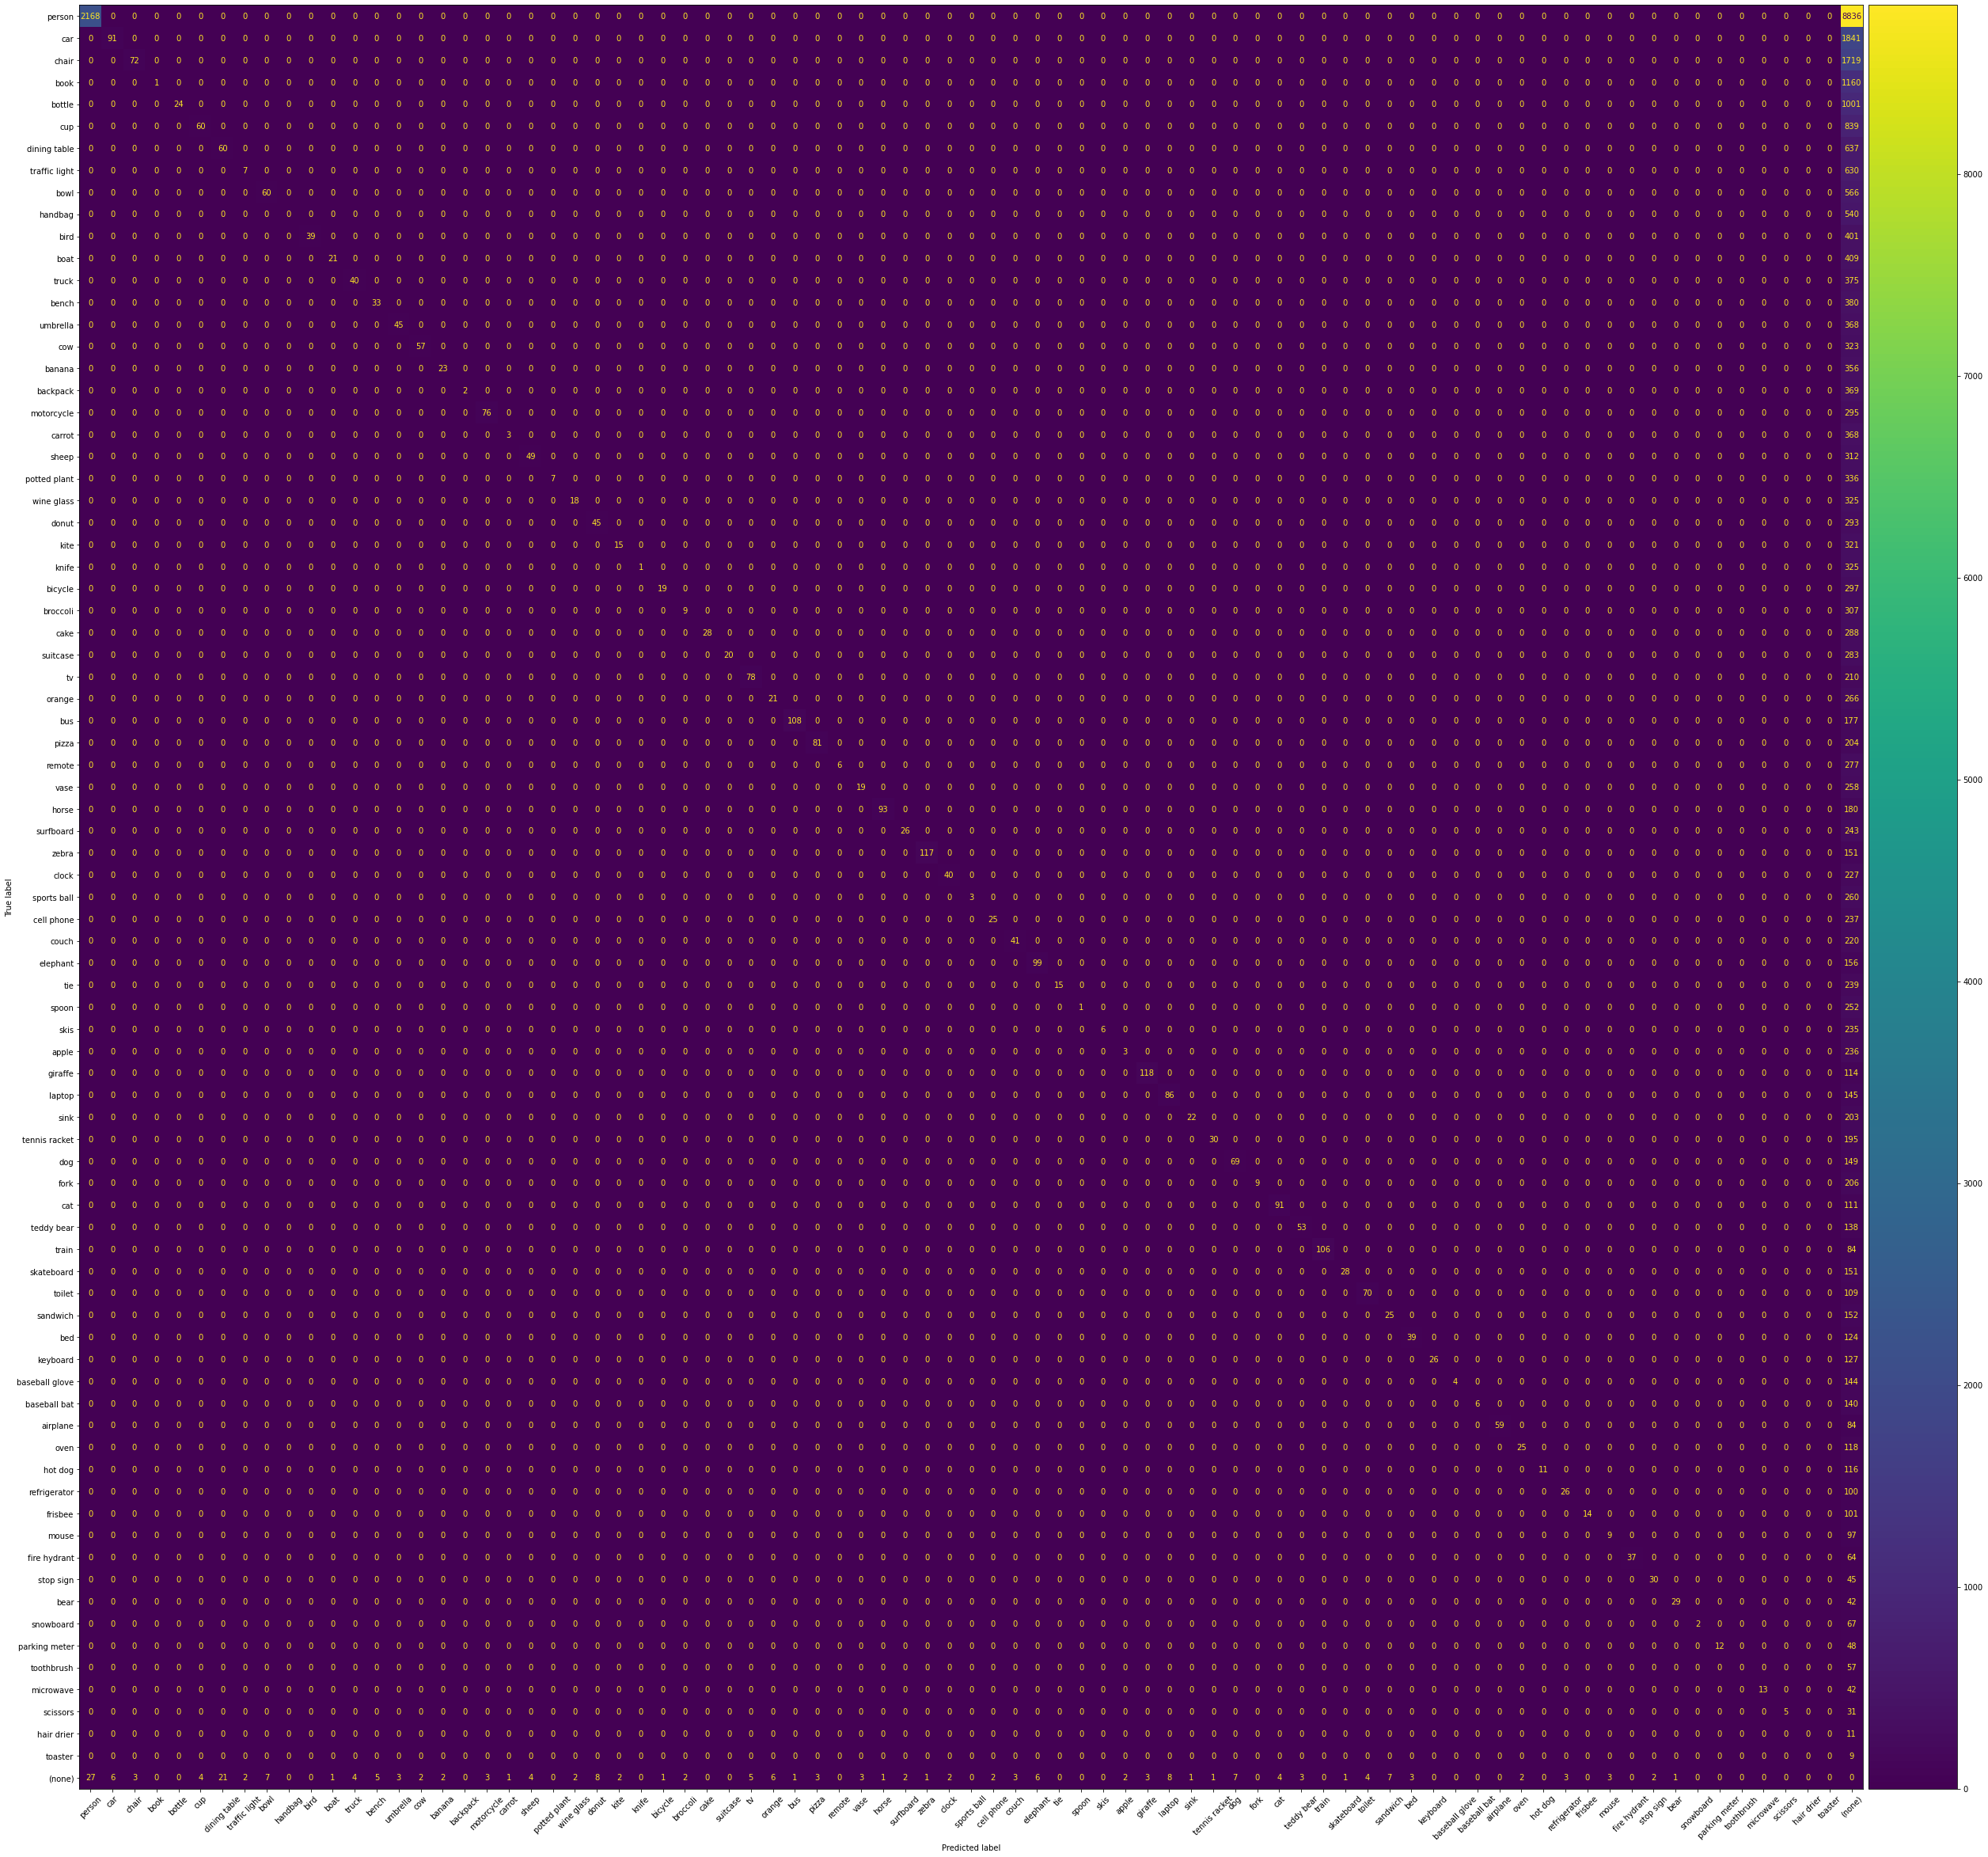

In [ ]:
plot = r_90.plot_confusion_matrix(classes=classes_sort[:], backend="matplotlib", figsize=(35, 35))
plot.show()

In [ ]:
plot = r_90.plot_confusion_matrix(classes=classes_sort[:10])
plot.show()

/usr/local/lib/python3.8/dist-packages/fiftyone/core/plots/plotly.py:1782: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://voxel51.com/docs/fiftyone/user_guide/plots.html#working-in-notebooks for more information.



### TP, FP, FN, IOU

In [ ]:
eval_patches = c_90.to_evaluation_patches("eval")

print(eval_patches.count_values("type"))

{'fp': 200, 'tp': 4929, 'fn': 31852}


In [ ]:
iou = eval_patches.count_values('iou')
x = list(iou.items())
sum_iou = 0.0
for i,v in x:
  if not i:
    continue
  sum_iou += (i * v)

print('IOU Score', sum_iou / sum(iou.values()))


IOU Score 0.11572376132548821


In [ ]:
sum(iou.values())

36981